## Описание данных

Каждая строка в наборе данных — отдельная игра с её характеристиками:

- `Name` — название игры  
- `Platform` — платформа (например, Xbox, PlayStation и т.д.)  
- `Year_of_Release` — год выпуска  
- `Genre` — жанр  
- `NA_sales` — продажи в Северной Америке (в млн копий)  
- `EU_sales` — продажи в Европе (в млн копий)  
- `JP_sales` — продажи в Японии (в млн копий)  
- `Other_sales` — продажи в других странах (в млн копий)  
- `Critic_Score` — оценка критиков (максимум — 100)  
- `User_Score` — оценка пользователей (максимум — 10)  
- `Rating` — возрастной рейтинг от **ESRB**

## Подготовка данных

In [149]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statistics as sts

In [150]:
data = pd.read_csv('/datasets/games.csv')

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Приведем названия колонок к нижнему регистру

In [152]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Обработка пропусков и типов данных

### Обзор пропусков в разных столбцах датафрейма

In [153]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Значения в колонке **'name'** являются категориальными и позволяют различать одно наблюдение от другого. 

Значения столбца **'genre'** представляют собой одну из ключевых категорий для анализа. 

Пропуски в столбце **'year_of_release'** также важны для нашего исследования. Учитывая, что таких пропусков немного, их можно удалить без значительных потерь данных.

Рассмотрим пропуски в столбцах **'critic_score'**, **'user_score'** и **'rating'** подробнее позже.

Каждая строка представляет собой отдельный исследуемый объект, и её ключевые характеристики нельзя заменять средними значениями, как это делают с объектами однородного типа.

### Обработка пропусков в столбцах 'name', 'genre'

Посмотрим на строки с пропусками в этих столбцах

In [154]:
data.query('(name.isna()) & (genre.isna())')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как видим - строки с этими пропусками совпадают. Они могут быть обусловленны ошибкой ввода или выгрузки данных.  

In [155]:
data = data.dropna(subset=['name', 'genre'])

Cмело удалим их, они никак не скажутся на анализе. 

### Обработка значений в стобце 'year_of_release'

Пропуски могут быть обусловленны ошибкой ввода или выгрузки данных. Удалим их, как решили выше.

In [156]:
data = data.dropna(subset=['year_of_release'])

Изменим тип данных столбца год релиза в соответствии с логическим содержанием колонки (год не может быть выражен дробным числом)

In [157]:
data['year_of_release'] = data['year_of_release'].astype('int')

### Обработка значений в стобцах 'critic_score', 'user_score' и 'rating' 

#### Обработка значений в стобце 'user_score' 

Посмотрим, почему столбцу 'user_score' соответствует не числовой формат

In [158]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце встречается значение 'tbd', которое соответсвтует отсутствию оценки. Заменим его на nan.

In [159]:
#data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

Рассмотрим пропуски в столбцах **'critic_score'**, **'user_score'** и **'rating'** подробнее

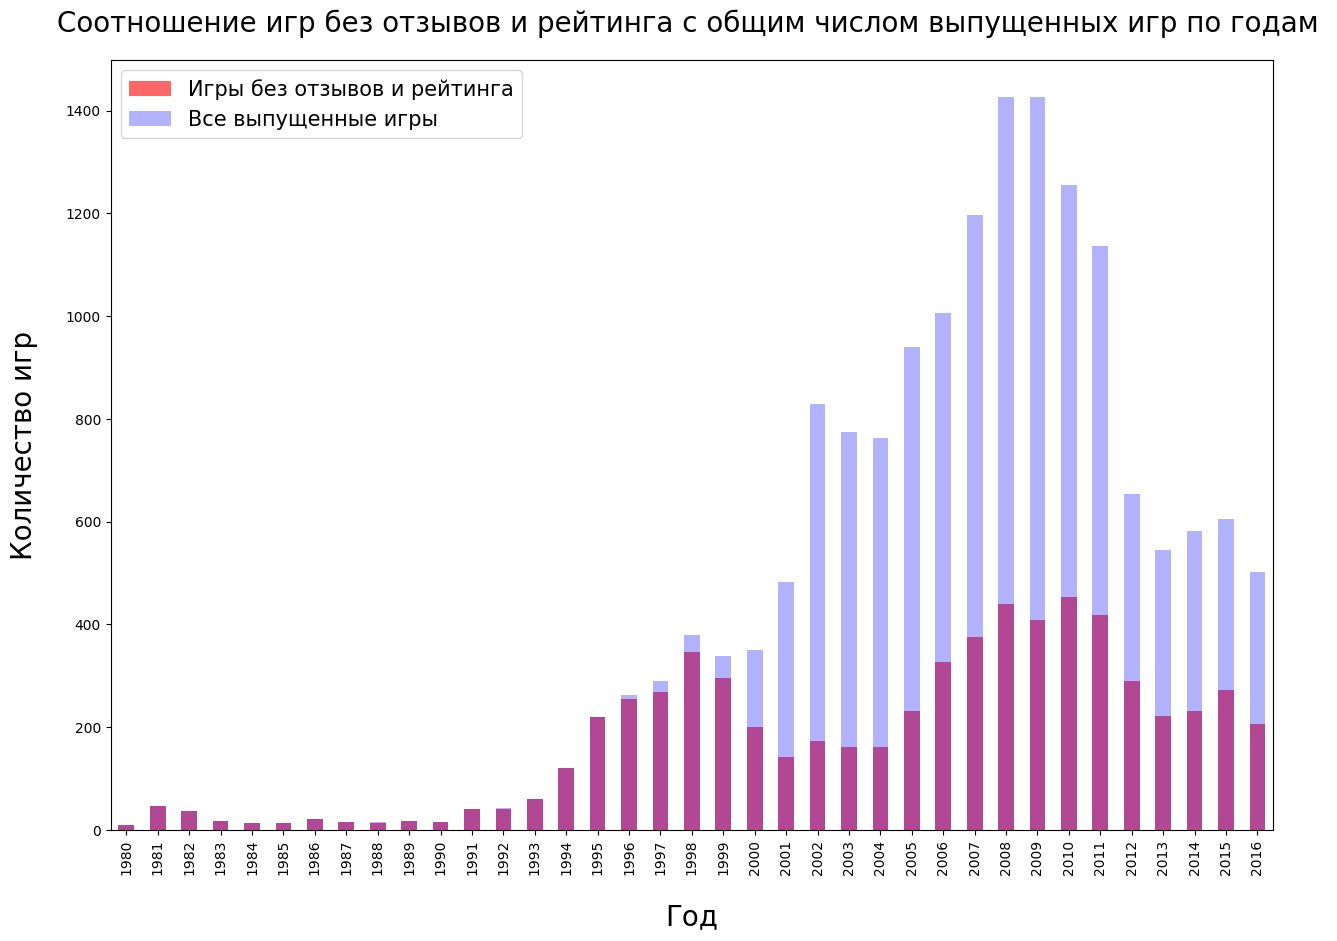

In [160]:
fig, ax = plt.subplots(figsize=(15, 10))

data.query('(critic_score.isna()) and (user_score.isna()) and (rating.isna())')['year_of_release'] \
    .value_counts().sort_index().plot(kind='bar', ax=ax, color='red', alpha=0.6, label='Игры без отзывов и рейтинга')

data['year_of_release'].value_counts().sort_index().plot(
    kind='bar', ax=ax, color='blue', alpha=0.3, label='Все выпущенные игры')

plt.title('Соотношение игр без отзывов и рейтинга с общим числом выпущенных игр по годам ', fontsize=20, pad=20)
plt.xlabel('Год', fontsize=20, labelpad=20)
plt.ylabel('Количество игр', fontsize=20, labelpad=20)

ax.legend(prop={'size': 15});

In [161]:
# число игр выпущенных до 2000 года
len(data.query('(year_of_release < 2000)'))

1974

In [162]:
# число игр выпущенных до 2000 года без отзывов и рейтинга
len(data.query('(critic_score.isna()) and (user_score.isna()) and (rating.isna()) and (year_of_release < 2000)'))

1865

In [163]:
# число игр выпущенных до 2000 года без отзывов и рейтинга
len_nan_rating_2000 = len(data.query(
    '(critic_score.isna()) and (user_score.isna()) and (rating.isna()) and (year_of_release < 2000)'))

# число игр без отзывов и рейтинга выпущенных за все время
len_nan_rating = len(data.query('(critic_score.isna()) and (user_score.isna()) and (rating.isna())'))

print(f'Процент пропусков отзывов до 2000 года от общего числа пропусков: {(len_nan_rating_2000 / len_nan_rating):.0%}')

Процент пропусков отзывов до 2000 года от общего числа пропусков: 28%


Треть пропусков в столбцах с оценками критиков и пользователей почти полностью совпадает с играми, выпущенными до 2000 года. Это говорит о том, что игры, выпущенные до 2000 года, не имели отзывов. Вероятно, это связано с отсутствием интернета и способов коммуникации между геймерами, что обусловлено зачаточным состоянием индустрии и ограниченным доступом к интернету. Эти пропуски не являются аномалиями.

### Создание стобца 'sales_total' для удобства дальнейшего анализа

In [164]:
data['sales_total'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

## Поиск и обработка дубликатов

In [165]:
data.duplicated().sum()

0

In [166]:
data.duplicated(subset=['name', 'platform'], keep=False).sum()

6

In [167]:
data[data.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01


In [168]:
data = data.drop(index=16230)

Несмотря на совпадения в названии игры и платформе, такие записи нельзя считать дубликатами, поскольку они представляют собой самостоятельные игры, выпущенные в разное время на одних и тех же платформах. Исключение составляет игра Madden NFL 13, которая встречается только один раз. Эту запись следует удалить вручную.

## Исследовательский анализ данных


In [169]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


 ### Рассмотрим колличество выпущенных игр

  Посмотрим на число игр выпущенных в разные годы

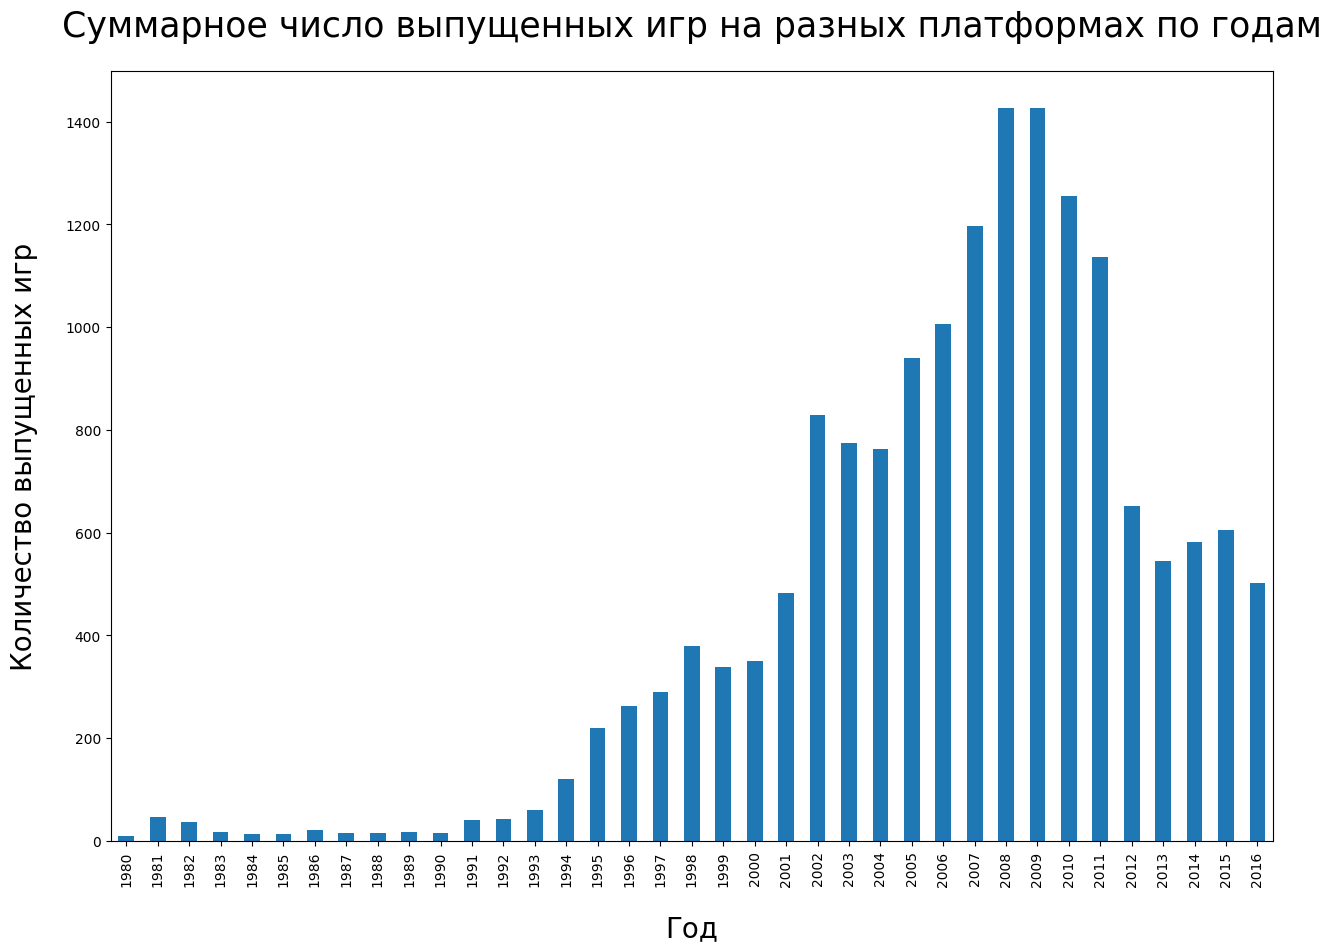

In [170]:
data['year_of_release'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(15, 10))

plt.title('Суммарное число выпущенных игр на разных платформах по годам', fontsize=25, pad=25)
plt.xlabel('Год', fontsize=20, labelpad=20)
plt.ylabel('Количество выпущенных игр', fontsize=20, labelpad=20);

In [171]:
data.pivot_table(index='year_of_release', values='platform', aggfunc='count')

,platform
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Видим, что количество игр, выпущенных до 1994 года, не достигает даже сотни, что объясняется начальным этапом развития игровой индустрии. Данные до 1994 года можно считать неактуальными. Взглянем на общее распределение выпуска игр по платформам и годам.

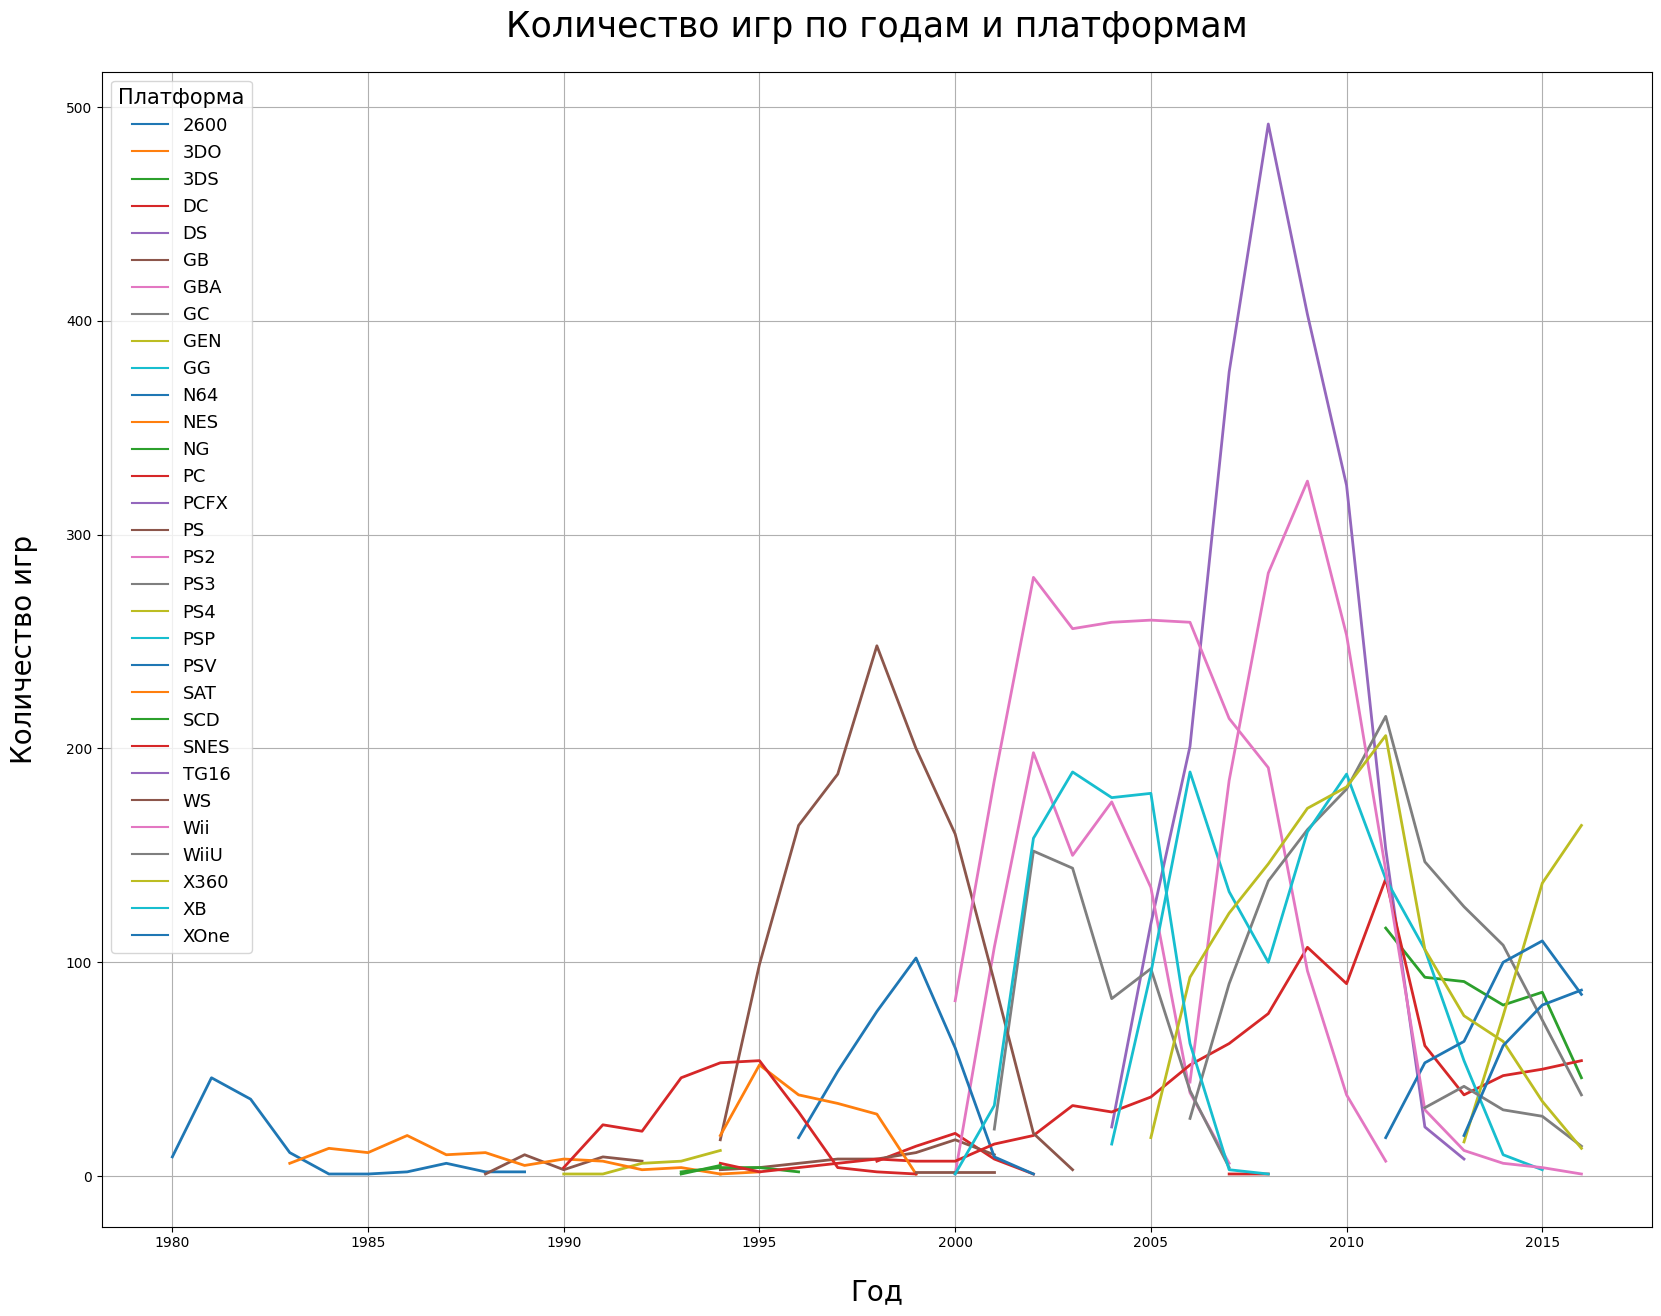

In [172]:
data.pivot_table(index='year_of_release', columns='platform', values='sales_total', aggfunc='count').plot(
    grid=True, kind='line', figsize=(20, 15))

plt.title('Количество игр по годам и платформам', fontsize=25, pad=25)
plt.xlabel('Год', fontsize=20, labelpad=20)
plt.ylabel('Количество игр', fontsize=20, labelpad=20)
plt.legend(title='Платформа', fontsize=13, frameon=True, loc='upper left', title_fontsize=15);

lines = plt.gca().get_lines()
for line in lines:
    line.set_linewidth(2) 

По графику видно, что пик производства игр приходится на середину жизненного цикла платформы. Также можно отметить, что все актуальные на 2017 год платформы были выпущены в 2013 году. Рассмотрим этот период подробнее.

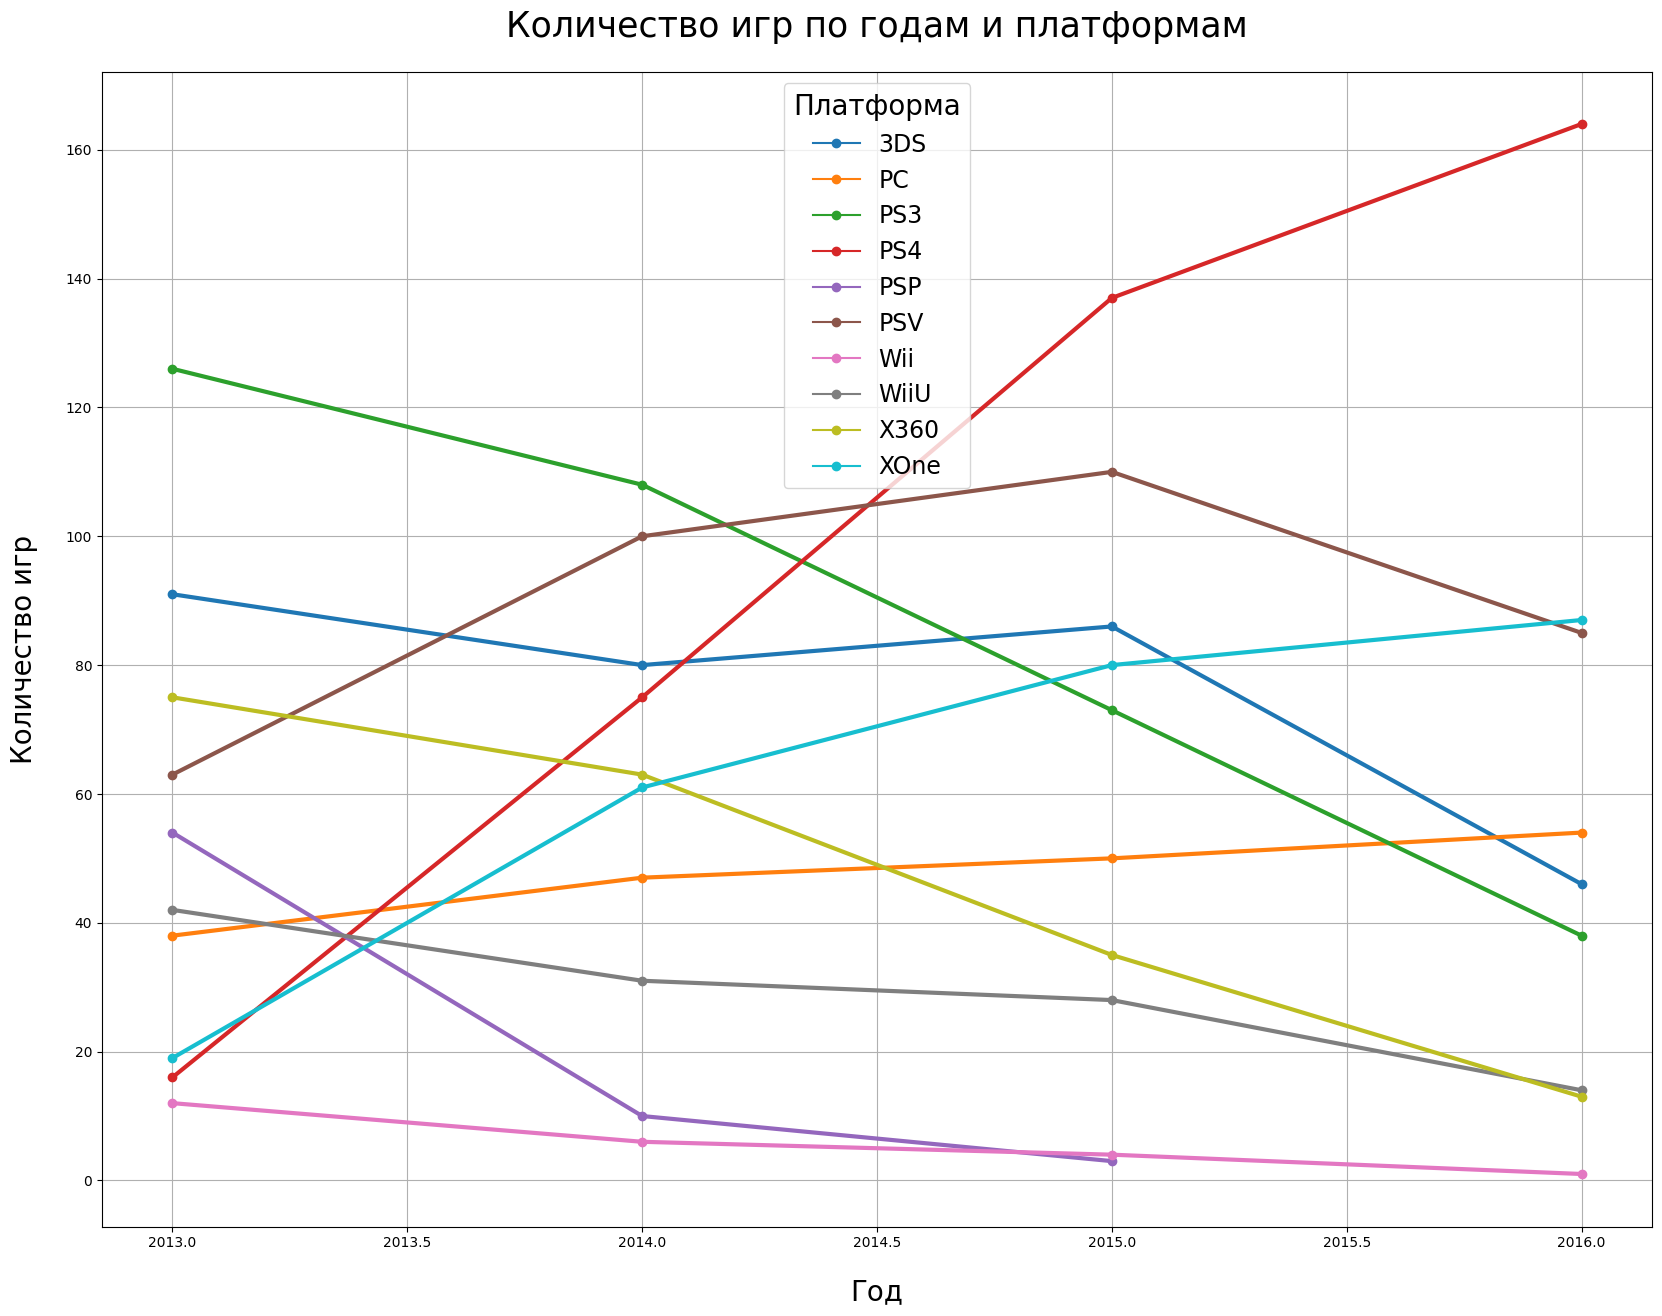

In [173]:
data.query('(2012 < year_of_release) & (platform != "DS")').pivot_table(
    index='year_of_release', columns='platform', values='sales_total', aggfunc='count').plot(
    grid=True, kind='line', figsize=(20, 15), marker='o')

plt.title('Количество игр по годам и платформам', fontsize=25, pad=25)
plt.xlabel('Год', fontsize=20, labelpad=20)
plt.ylabel('Количество игр', fontsize=20, labelpad=20)
plt.legend(title='Платформа', fontsize=17, frameon=True, loc='best', title_fontsize=20);

lines = plt.gca().get_lines() 
for line in lines:
    line.set_linewidth(3)  

Видно, что наибольший расцвет игрового разнообразия переживает PS4. Несмотря на более скромные показатели, выпуск игр для Xbox One также продолжает расти. Рынок ПК-игр демонстрирует медленный, но стабильный рост. Все остальные платформы находятся в упадке.

### Рассмотрим количество проданных игр

 Посмотрим на распределение продаж игр по платформам

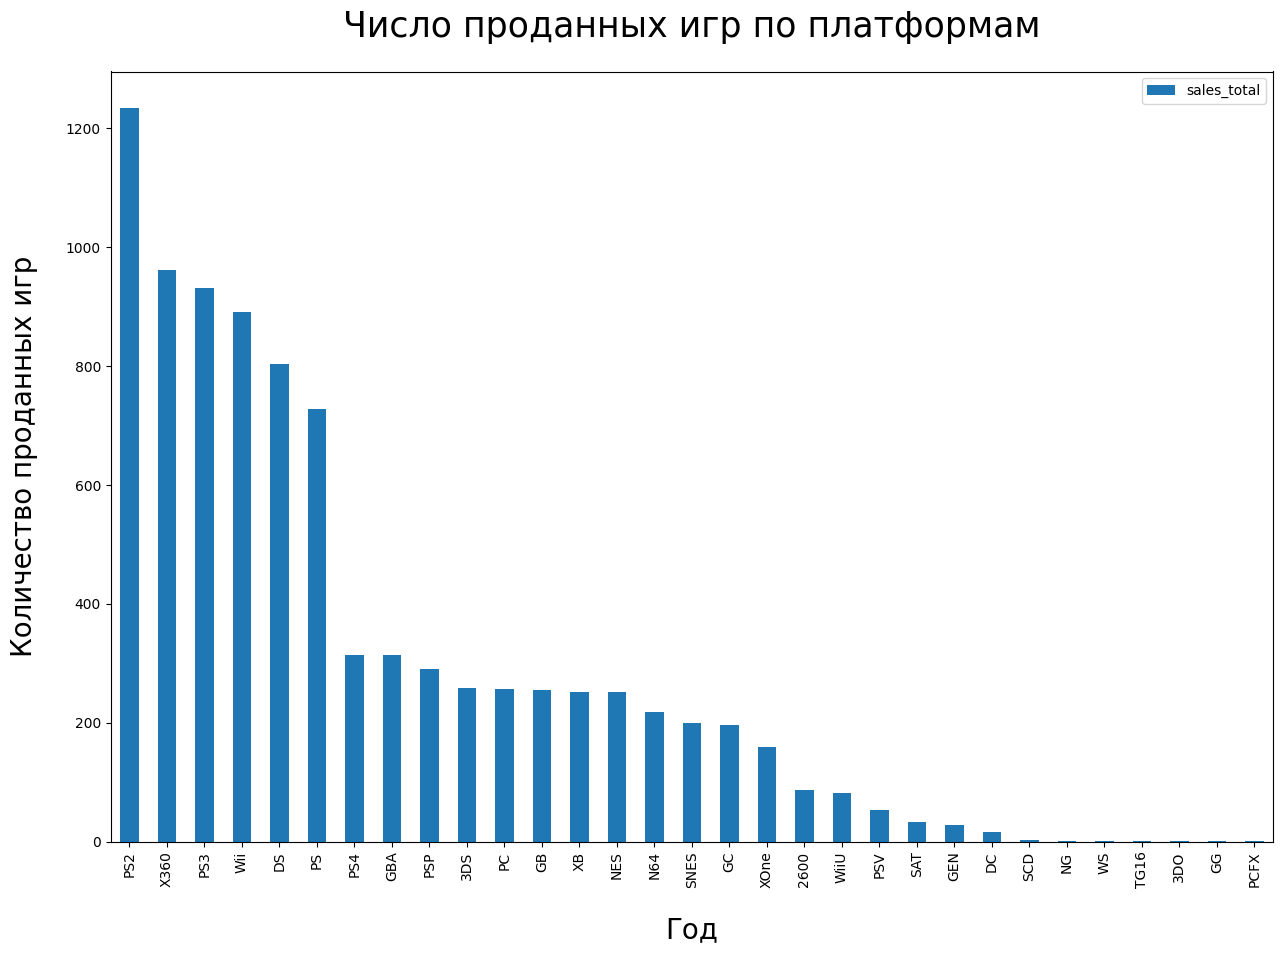

In [174]:
data.pivot_table(index='platform', values='sales_total', aggfunc='sum').sort_values(by='sales_total', ascending=False).plot(
    kind='bar', figsize=(15, 10))

plt.title('Число проданных игр по платформам', fontsize=25, pad=25)
plt.xlabel('Год', fontsize=20, labelpad=20)
plt.ylabel('Количество проданных игр', fontsize=20, labelpad=20);

Видно, что наиболее успешной платформой за всё время остаётся PS2. Консоли Xbox 360 и PS3 занимают второе и третье места соответственно. Десятку по продажам игр замыкает вечно актуальный ПК. Новая консоль Xbox One существенно отстаёт от своих конкурентов. Взглянем на распределение продаж игр по платформам во времени.

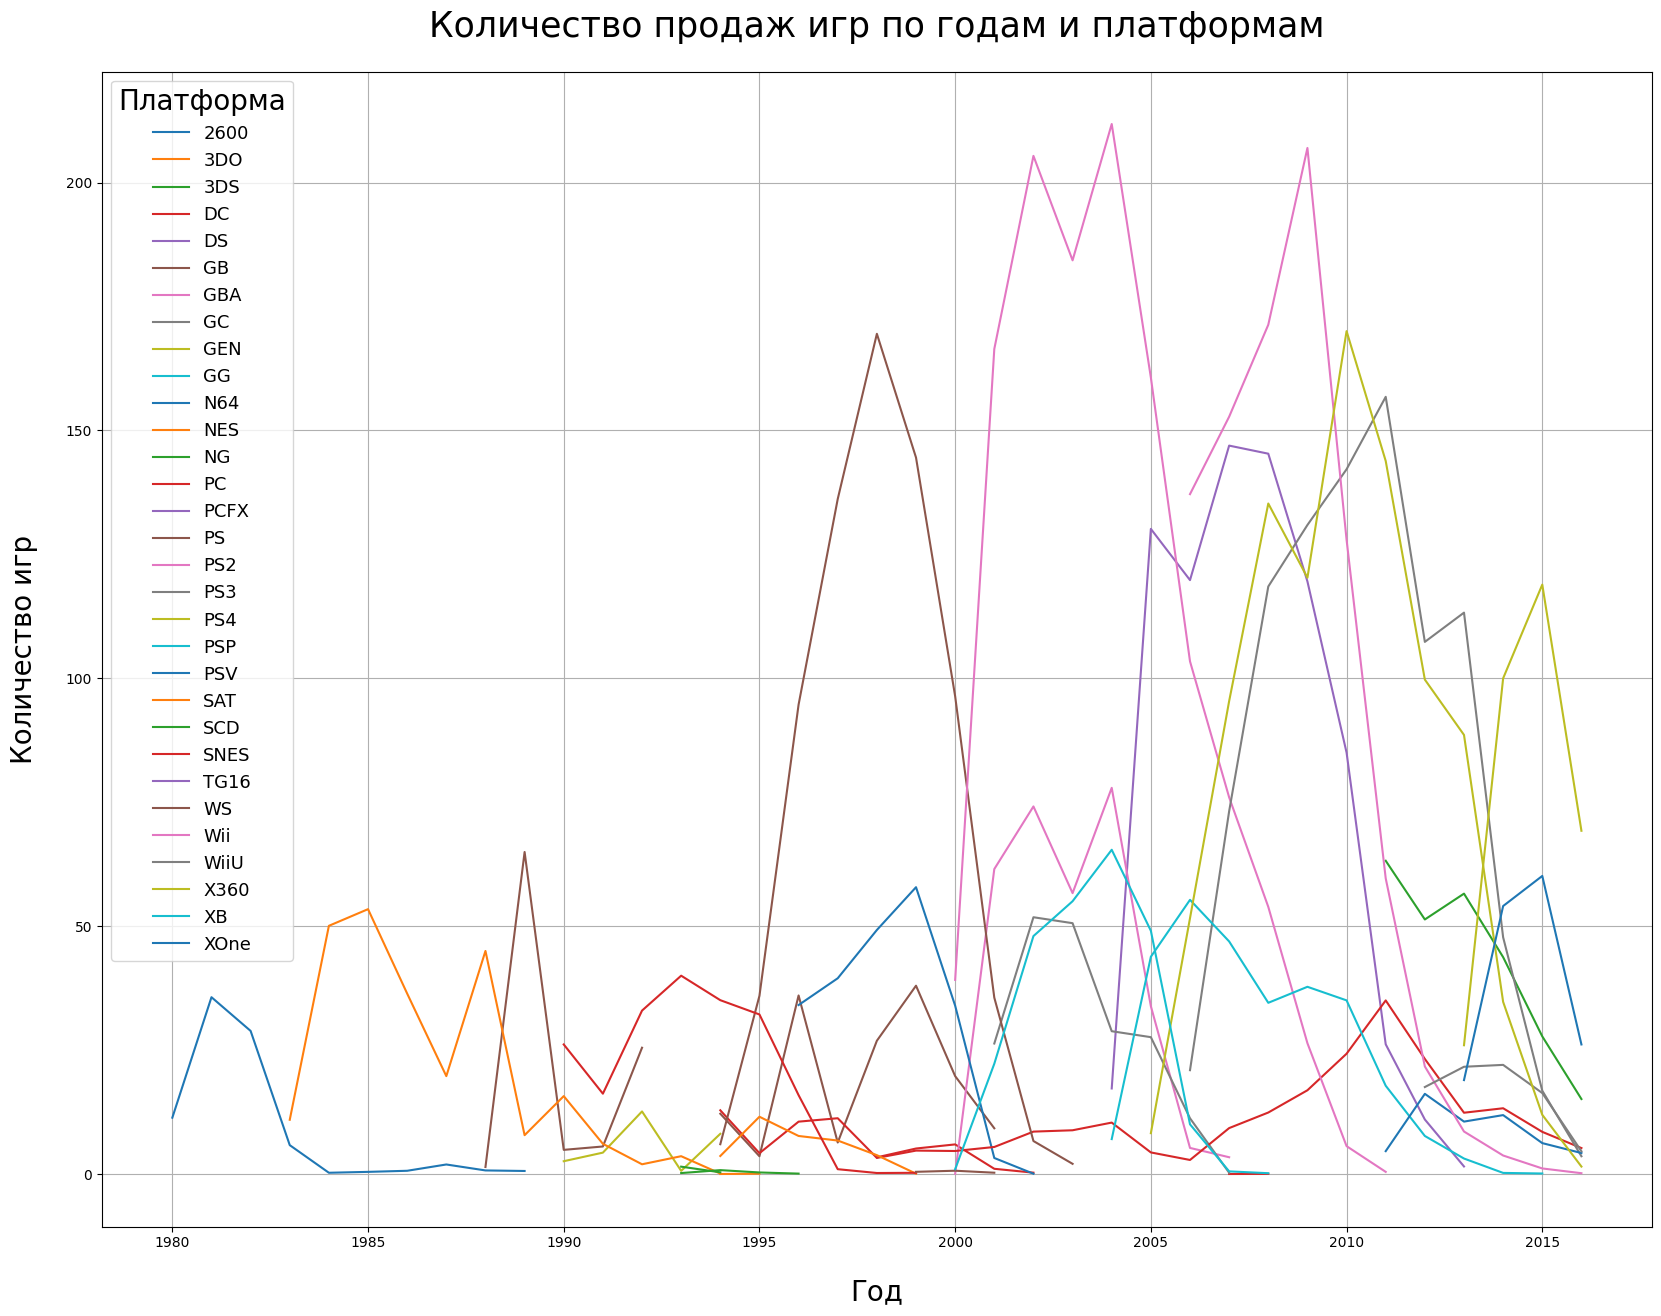

In [175]:
data.pivot_table(index='year_of_release', columns='platform', values='sales_total', aggfunc='sum').plot(
    grid=True, kind='line', figsize=(20, 15))

plt.title('Количество продаж игр по годам и платформам', fontsize=25, pad=25)
plt.xlabel('Год', fontsize=20, labelpad=20)
plt.ylabel('Количество игр', fontsize=20, labelpad=20)
plt.legend(title='Платформа', fontsize=13, frameon=True, loc='best', title_fontsize=20)

lines = plt.gca().get_lines() 
for line in lines:
    line.set_linewidth(1.5) 

Видно, что он во многом совпадает с графиком производства игр. Взглянем на актуальный период поподробнее.

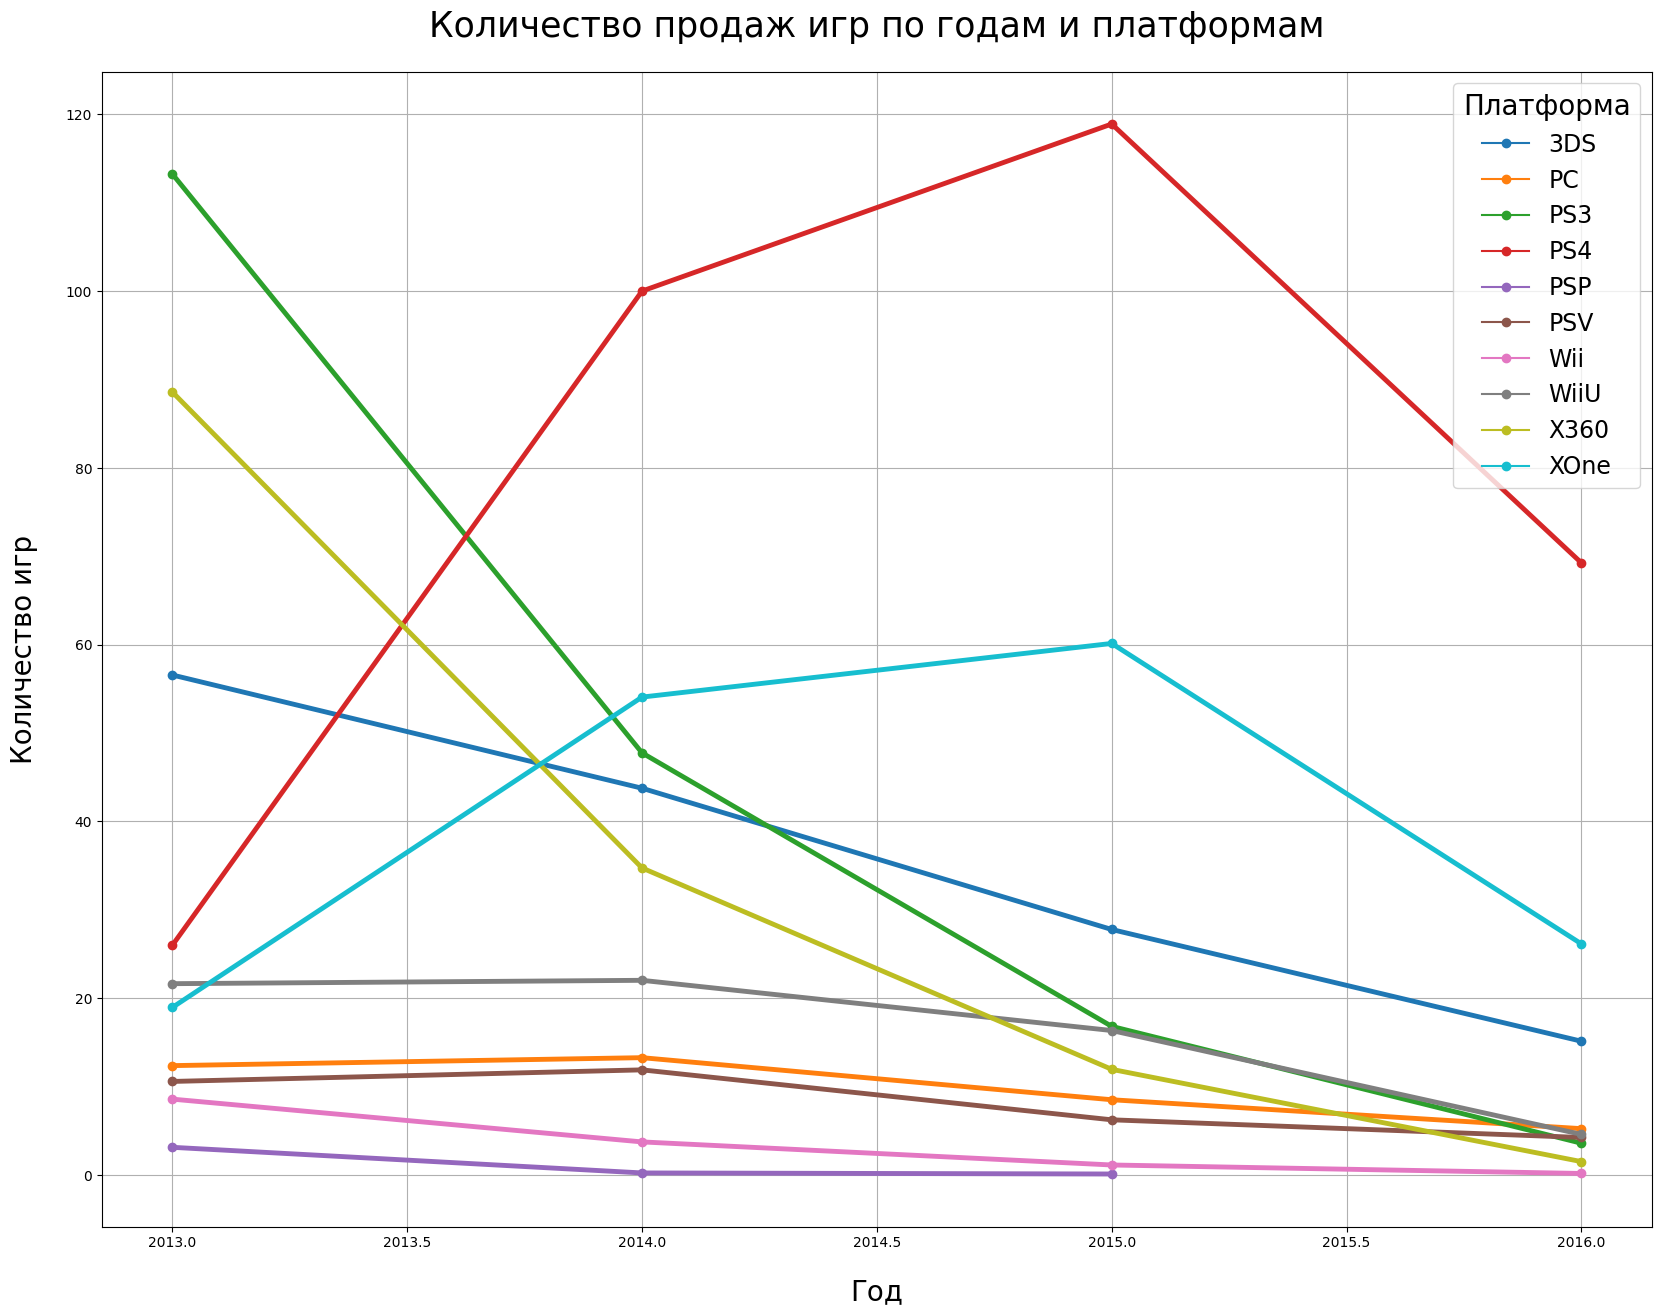

In [176]:
data.query('(2012 < year_of_release) & (platform != "DS")').pivot_table(
    index='year_of_release', columns='platform', values='sales_total', aggfunc='sum').plot(
    grid=True, kind='line', figsize=(20, 15), marker='o')

plt.title('Количество продаж игр по годам и платформам', fontsize=25, pad=25)
plt.xlabel('Год', fontsize=20, labelpad=20)
plt.ylabel('Количество игр', fontsize=20, labelpad=20)
plt.legend(title='Платформа', fontsize=17, frameon=True, loc='best', title_fontsize=20)

lines = plt.gca().get_lines()  
for line in lines:
    line.set_linewidth(3.5) 

Несмотря на рост производства игр, вся игровая индустрия испытывает кризис в контексте продаж. PS4 сохраняет лидерство по продажам среди своих конкурентов, но демонстрирует стремительное падение, как и её ближайший конкурент — Xbox One. Единственная стабильная платформа, хотя и с намного меньшими показателями продаж, — ПК: несмотря на стагнацию, она держится на одном уровне и не показывает столь значительного спада, хотя тенденция к снижению продаж всё же сохраняется.

### Рассмотрим платформы с наибольшими суммарными продажами

Выберем топ-10 платформ по суммарным прадажам

In [177]:
top_index = data.pivot_table(index='platform', values='sales_total', aggfunc='sum').sort_values(
    by='sales_total', ascending=False)[0:10].index.tolist()
top_index

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

Определим средний период жизни популярной платформы

In [178]:
platform_len = []

for i in top_index:
    max = data[data['platform'] == i]['year_of_release'].max()
    min = data[data['platform'] == i]['year_of_release'].min()
    platform_len.append(max - min)

platform_len = pd.Series(platform_len).dropna().tolist()
median_platform_len = sts.median(platform_len)
median_platform_len

10.0

Взглянем на распределение продаж на этих платформах во времени

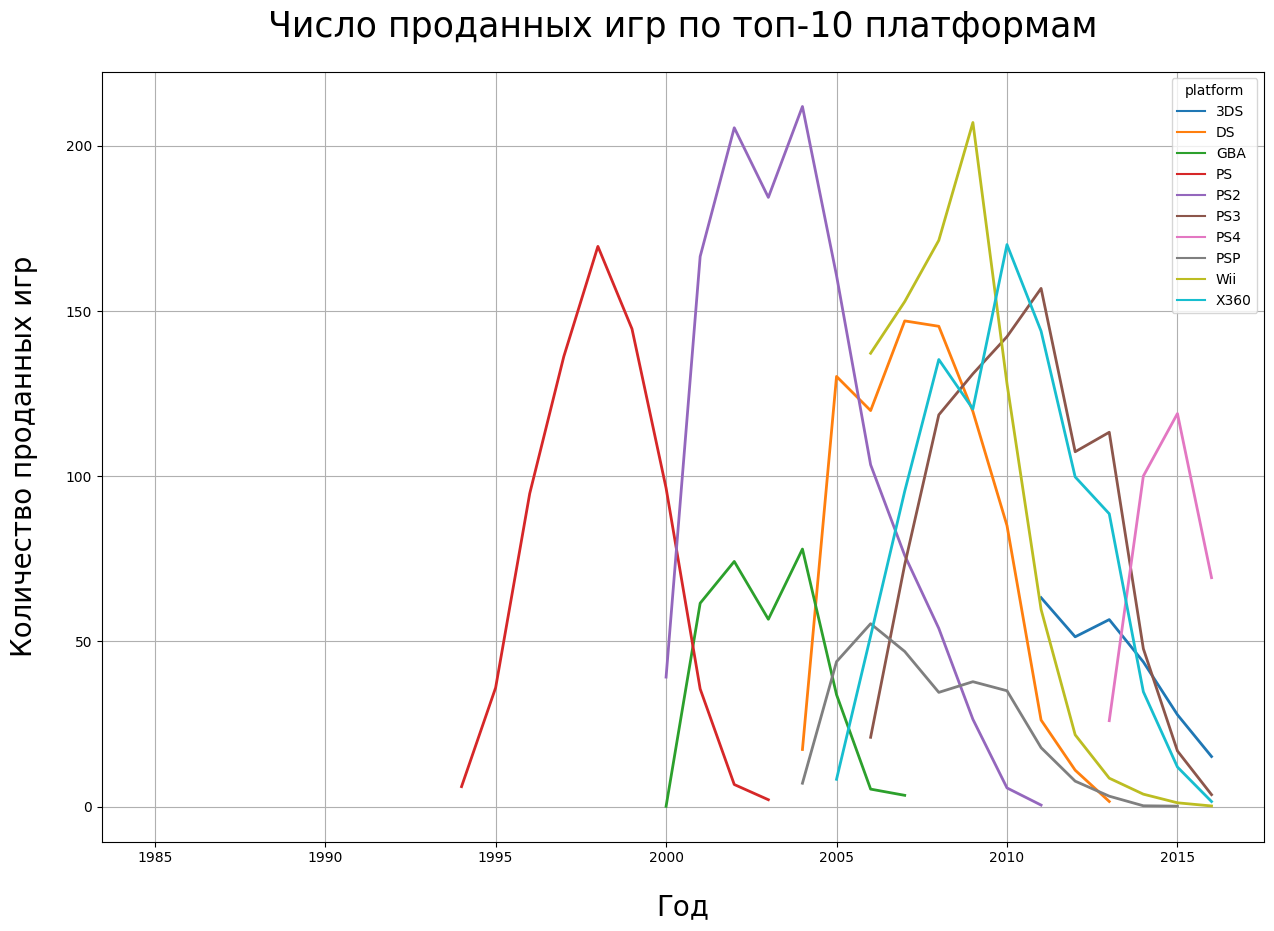

In [179]:
data_top = data.query('platform in @top_index')
data_top.pivot_table(index='year_of_release', columns='platform', values='sales_total', aggfunc='sum').plot(
    grid=True, kind='line', figsize=(15, 10))

plt.title('Число проданных игр по топ-10 платформам', fontsize=25, pad=25)
plt.xlabel('Год', fontsize=20, labelpad=20)
plt.ylabel('Количество проданных игр', fontsize=20, labelpad=20);

lines = plt.gca().get_lines() 
for line in lines:
    line.set_linewidth(2);


Посмотрим на распределение каждой платформы подробнее

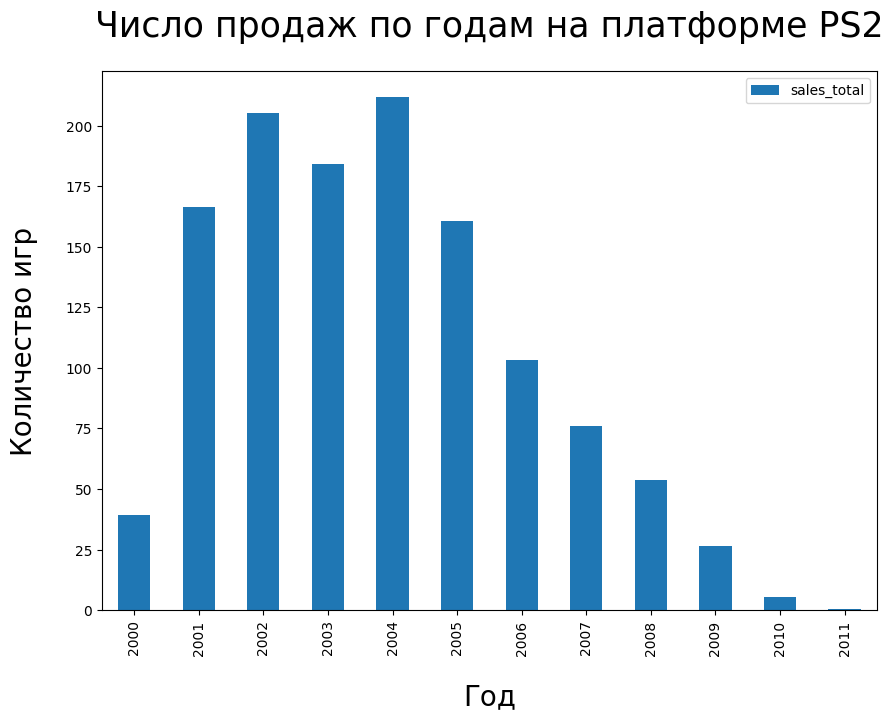

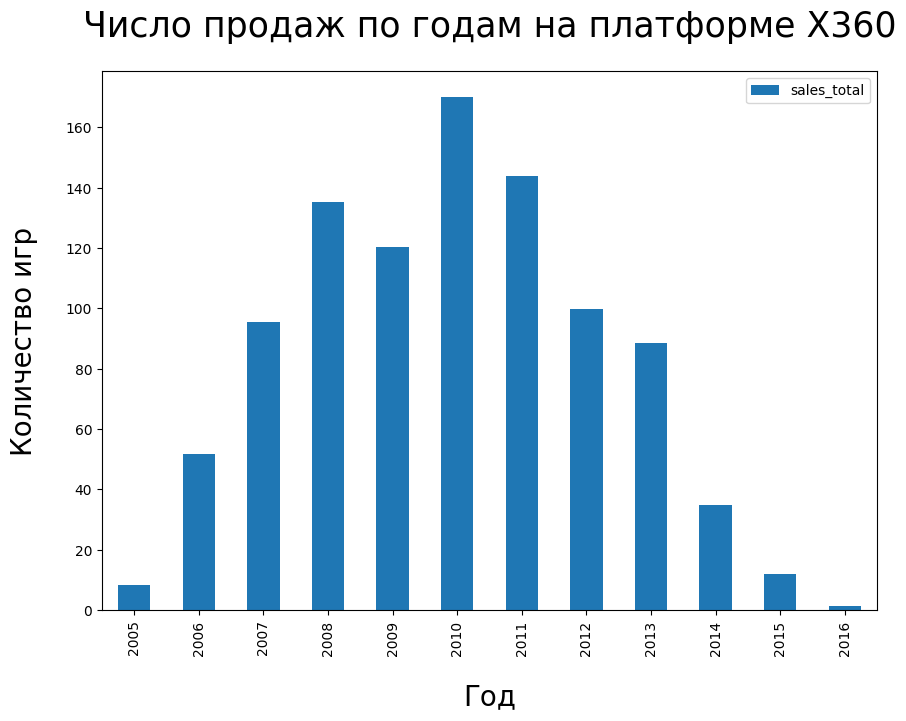

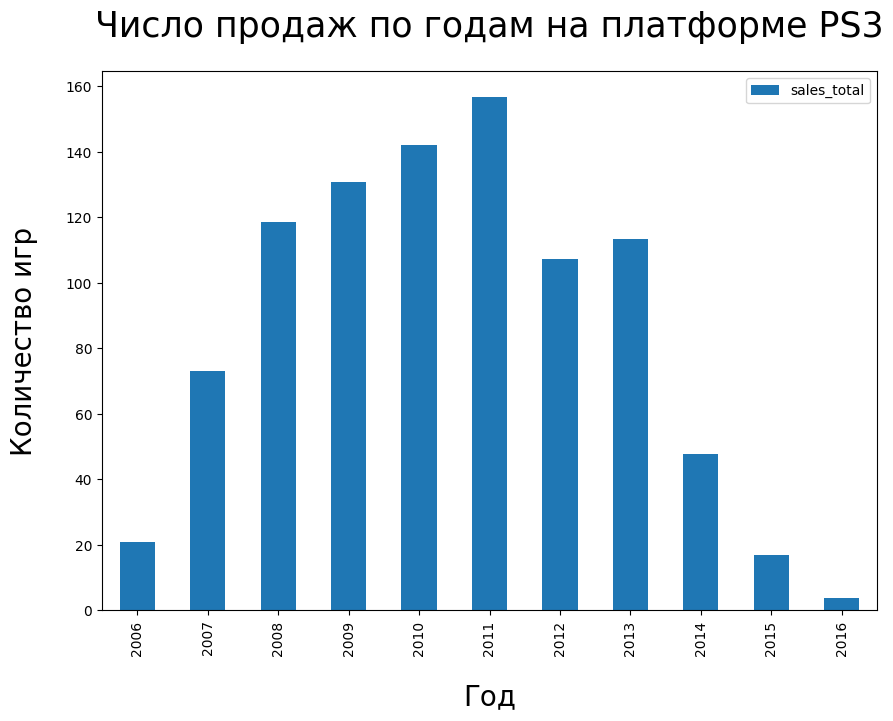

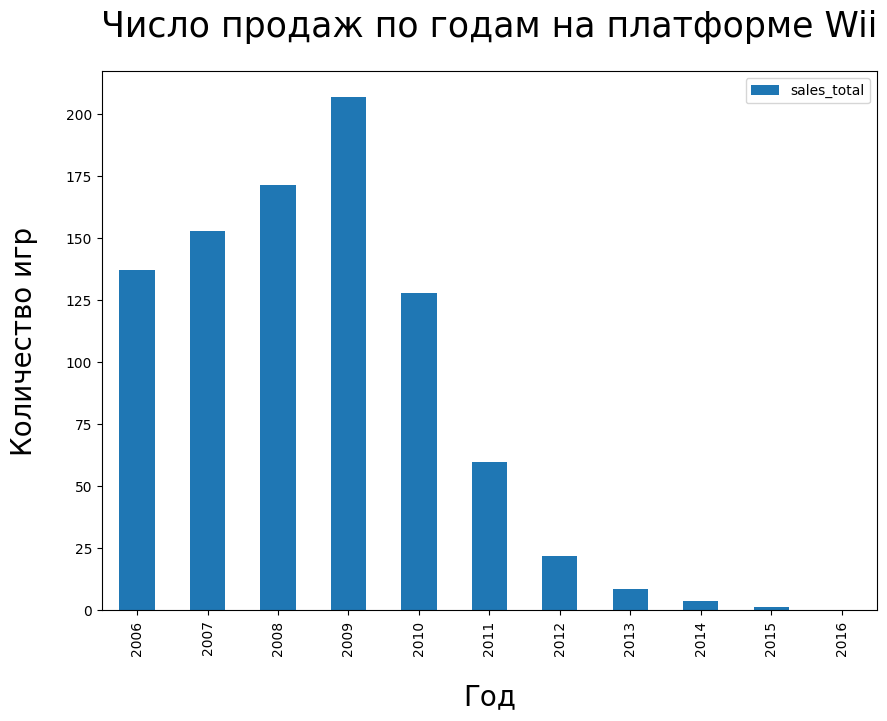

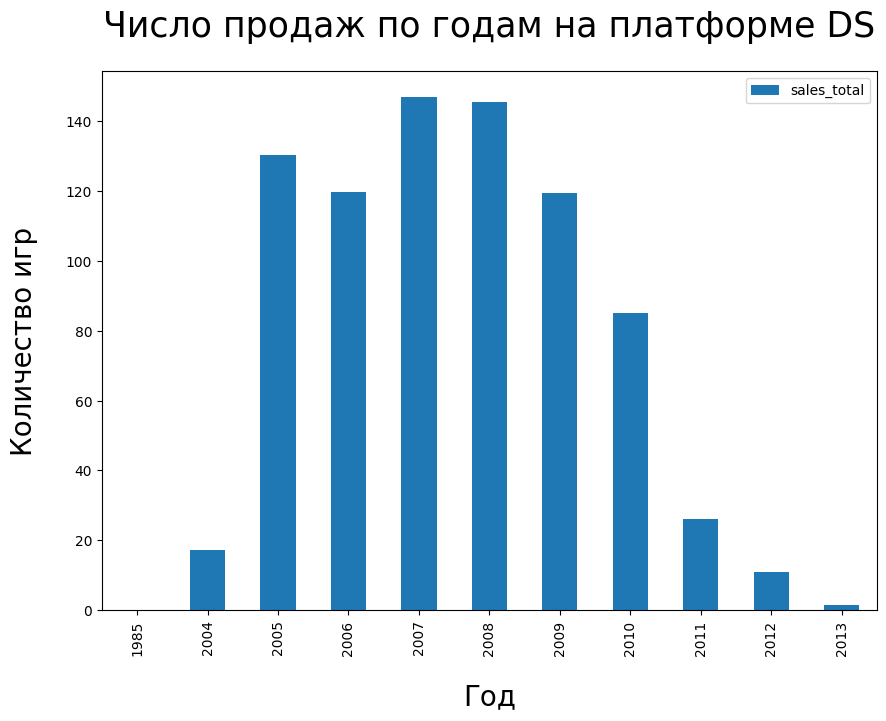

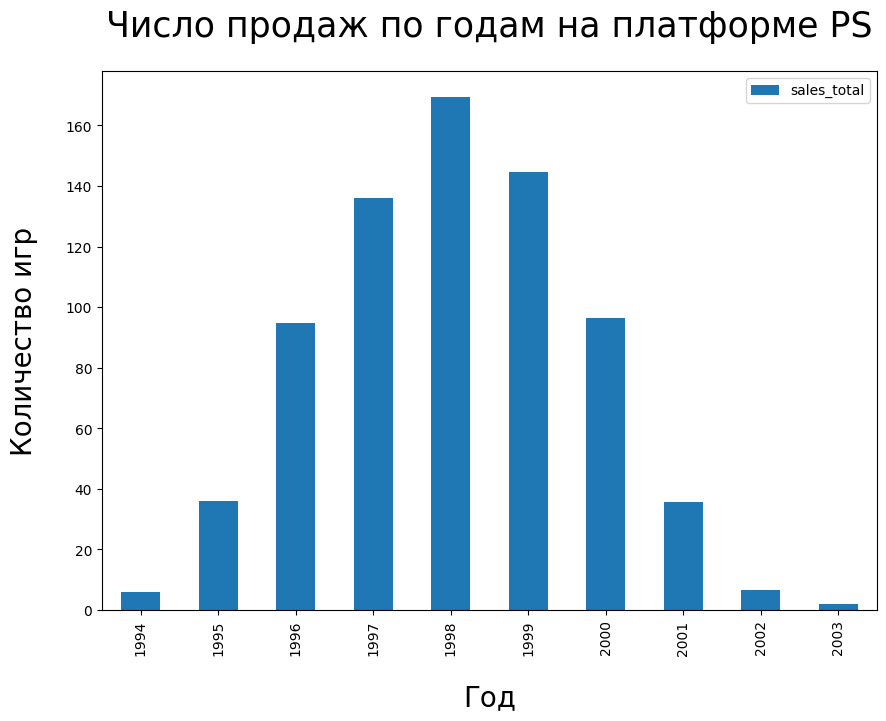

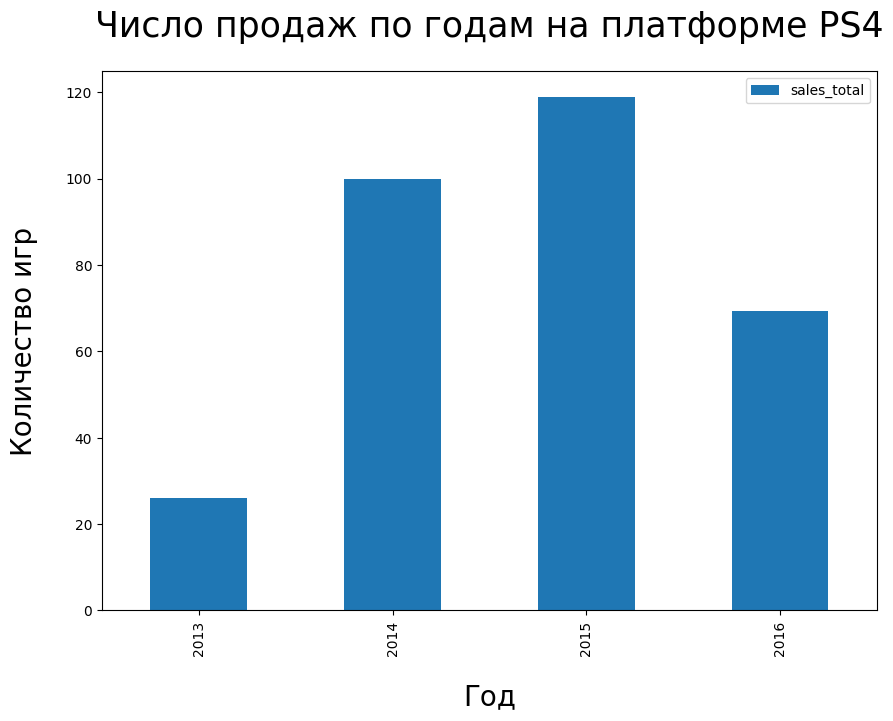

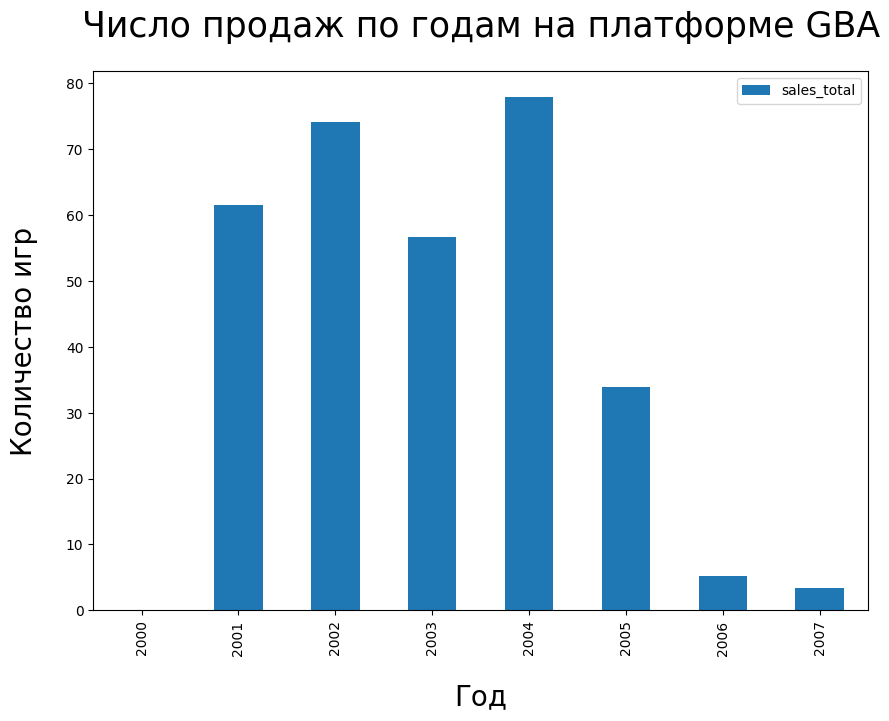

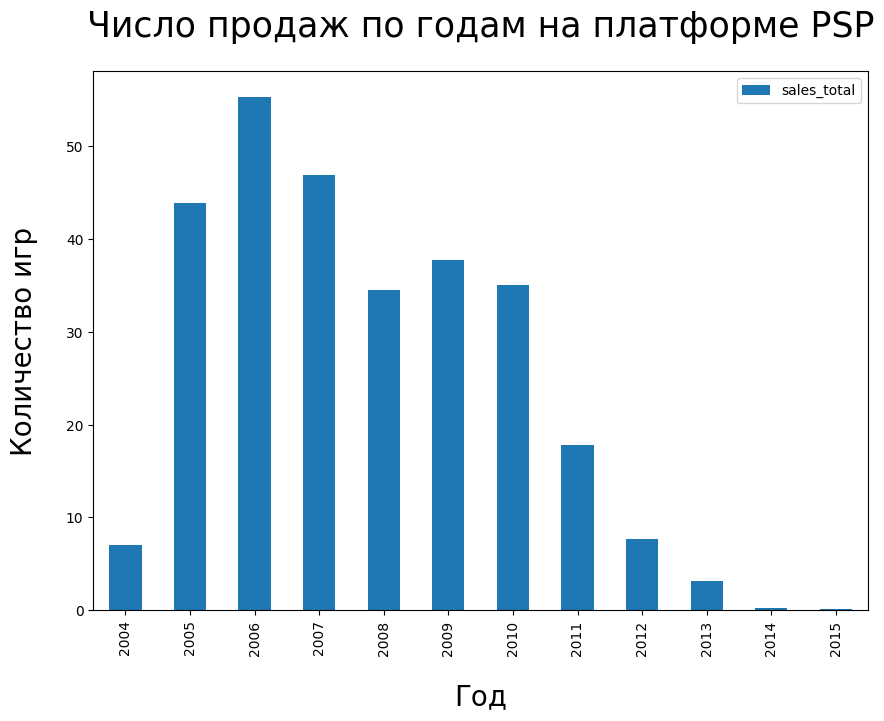

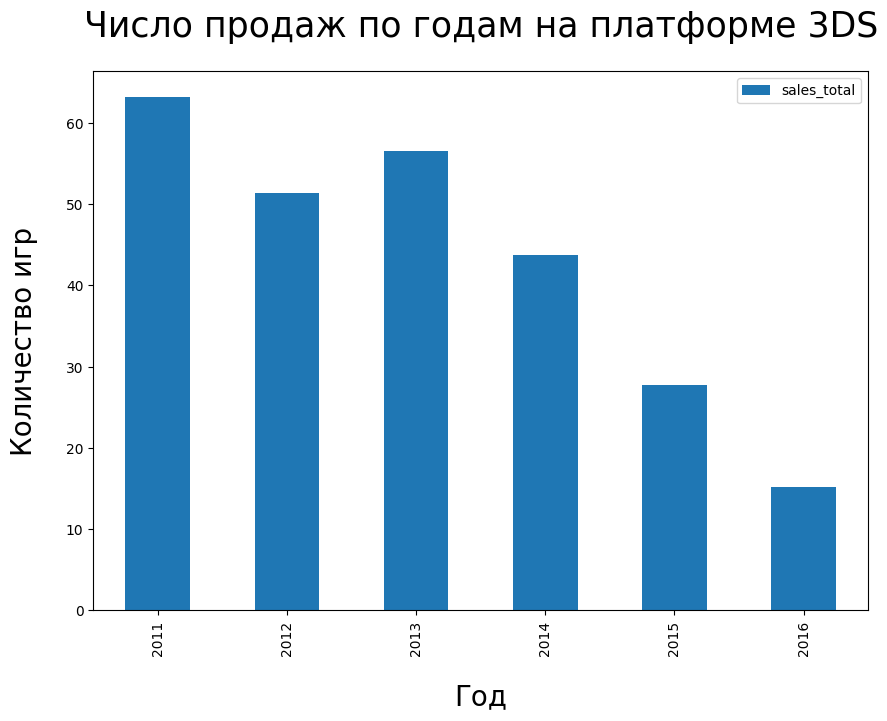

In [180]:
for i in top_index:
    data[data['platform'] == i].pivot_table(index='year_of_release', values='sales_total', aggfunc='sum').plot(
        kind='bar', figsize=(10, 7))
    
    plt.title('Число продаж по годам на платформе ' + i , fontsize=25, pad=25)
    plt.xlabel('Год', fontsize=20, labelpad=20)
    plt.ylabel('Количество игр', fontsize=20, labelpad=20);

По графикам видно, что в среднем жизненный цикл платформы составляет около 10 лет, с пиком популярности в середине этого периода. Исключение составляет ПК, который остаётся актуальным на протяжении всего времени. Это связано с тем, что ПК не является исключительно игровой платформой. Кроме того, ПК подстраивается под актуальные системные требования, и для этого не требуется переход на другую платформу. Достаточно обновить характеристики текущего компьютера.

Посмотрим на распределение суммарных продаж для каждой актуальной платформы

In [181]:
actual_index = data[data['year_of_release'] > 2012]['platform'].unique().tolist()
actual_index

['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV', 'DS', 'PSP']

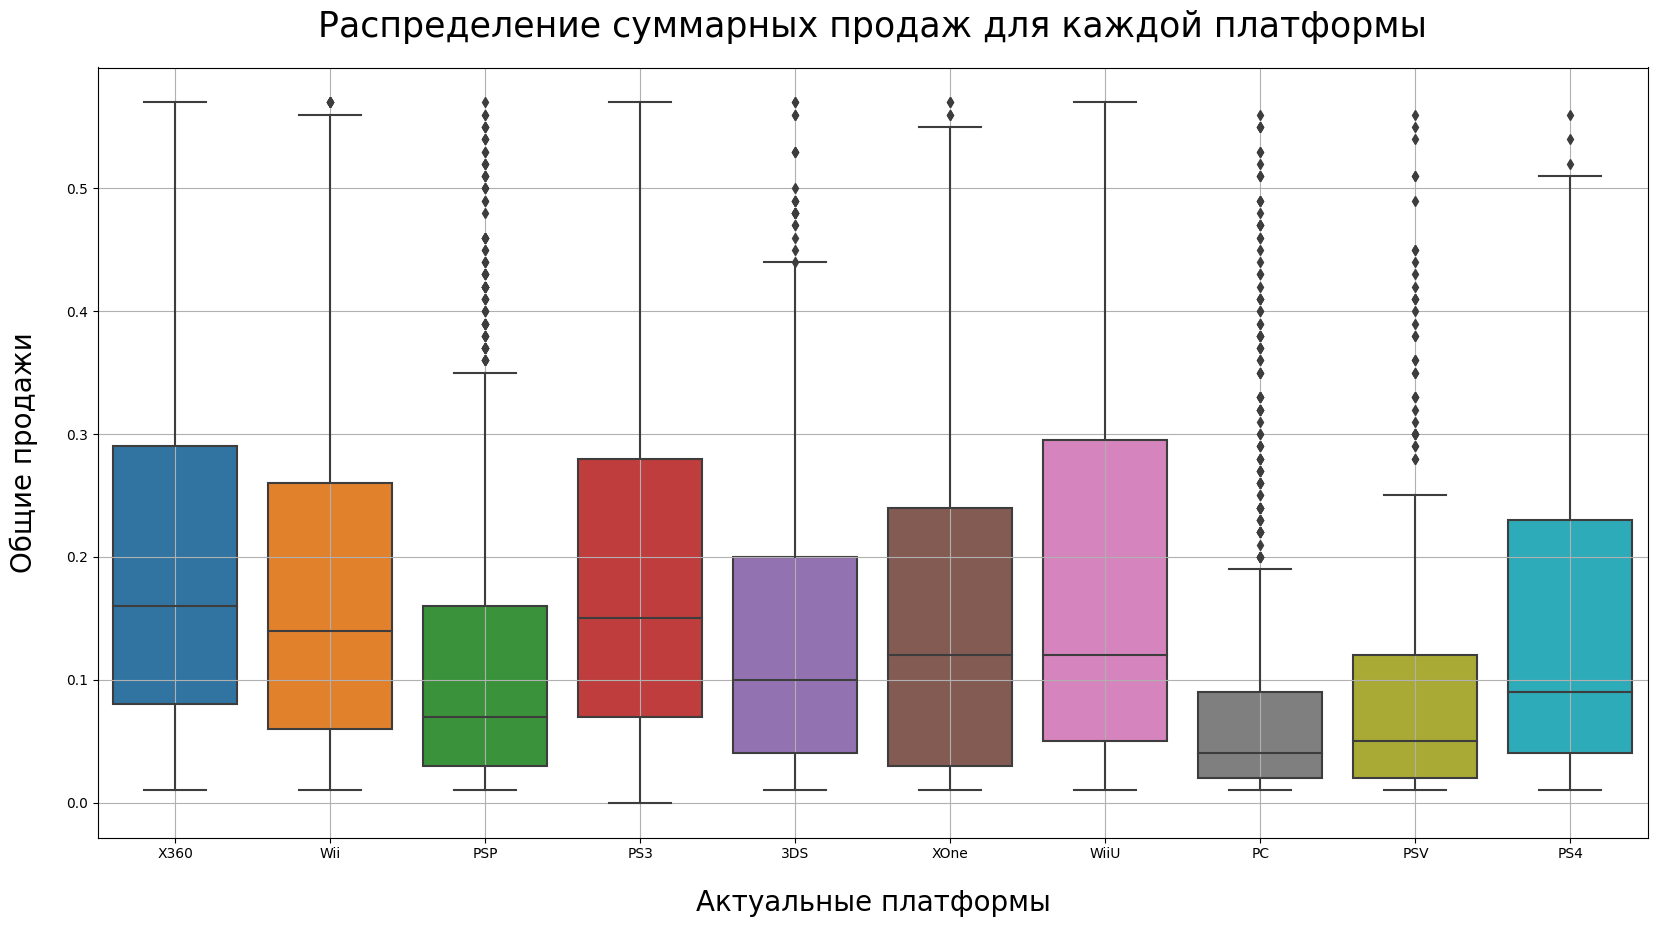

In [182]:
plt.figure(figsize=(20, 10))

actual_index = data.query('(2012 < year_of_release) & (platform != "DS")')['platform'].tolist()

sns.boxplot(x='platform', y='sales_total', data=data.query('(platform in @actual_index) & (sales_total < 0.575)'))

plt.title("Распределение суммарных продаж для каждой платформы", fontsize=25, pad=22)
plt.xlabel('Актуальные платформы', fontsize=20, labelpad=20)
plt.ylabel('Общие продажи', fontsize=20, labelpad=20);
plt.grid(True)

Самыми крупными тиражами продались игры на Xbox 360 и PS3, но это можно объяснить тем, что эти платформы существуют давно и практически завершили свой жизненный цикл, в отличие от недавно выпущенных PS4 и Xbox One. 

Хотя в среднем каждая игра на Xbox One продается большим тиражом (более 1 миллиона копий), в абсолютных значениях PS4 лидирует как по количеству выпущенных игр, так и по общим объемам продаж. 

Wii U также демонстрировала высокие показатели, но её популярность снижается, и выпуск игр на этой платформе сводится к нулю. Это касается всех платформ, кроме PS4, Xbox One и ПК. 

### Исследуем взаимосвязь числа продаж и отзывов пользователей и критиков

#### Отзывы покупателей внутри платформы PS3

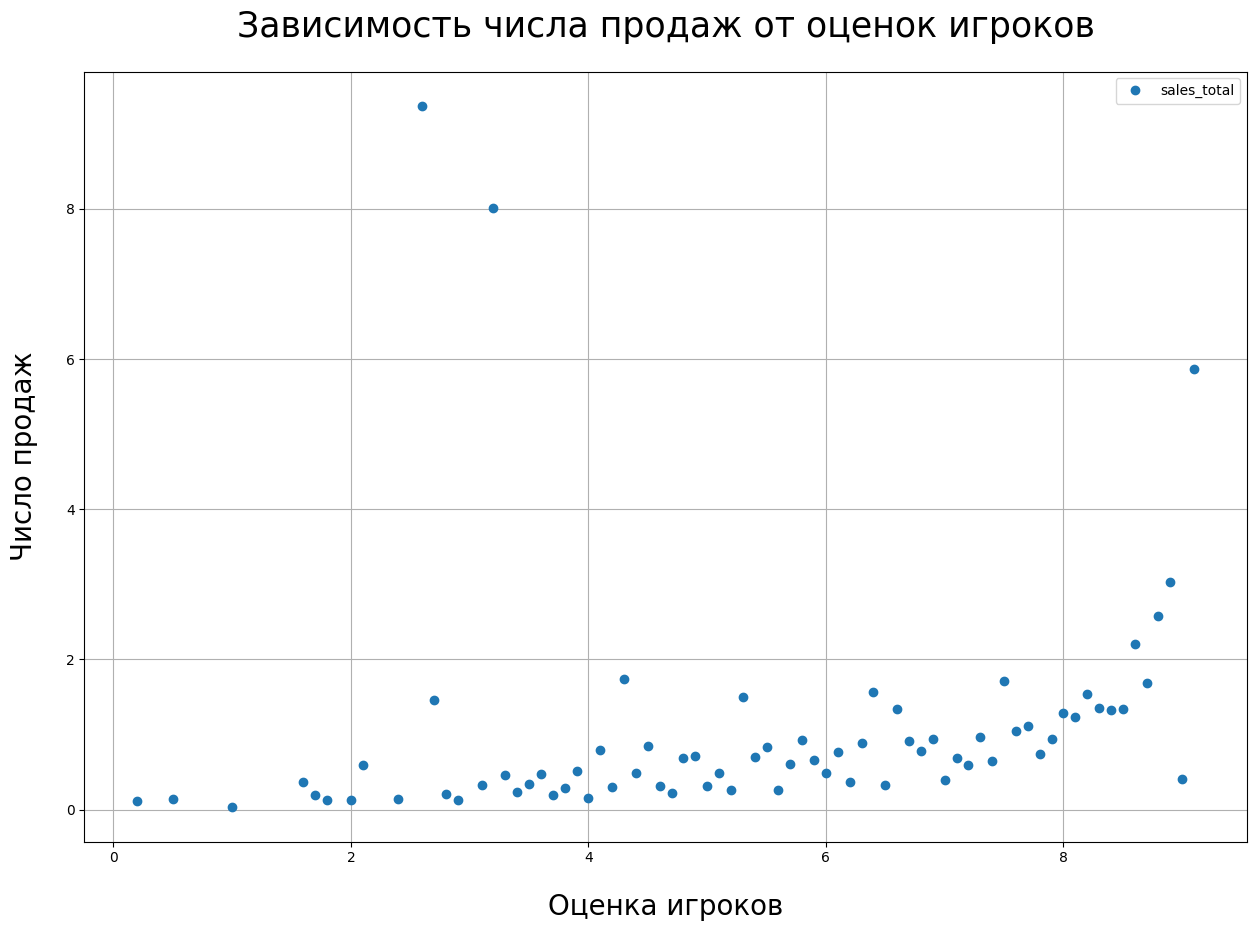

In [183]:
data.query('platform == "PS3"').pivot_table(index='user_score', values='sales_total', aggfunc='mean').plot(
    y='sales_total', grid=True, figsize=(15, 10), style='o');

plt.title('Зависимость числа продаж от оценок игроков', fontsize=25, pad=25)
plt.xlabel('Оценка игроков', fontsize=20, labelpad=20)
plt.ylabel('Число продаж', fontsize=20, labelpad=20);

In [184]:
data.query('(platform == "PS3")')['user_score'].corr(data.query('(platform == "PS3")')['sales_total'], method='spearman')

0.31456189845407617

Прослеживается зависимость между продажами и оценками пользователей, которая становится немного заметной на высоких оценках.

#### Отзывы критиков внутри платформы PS3


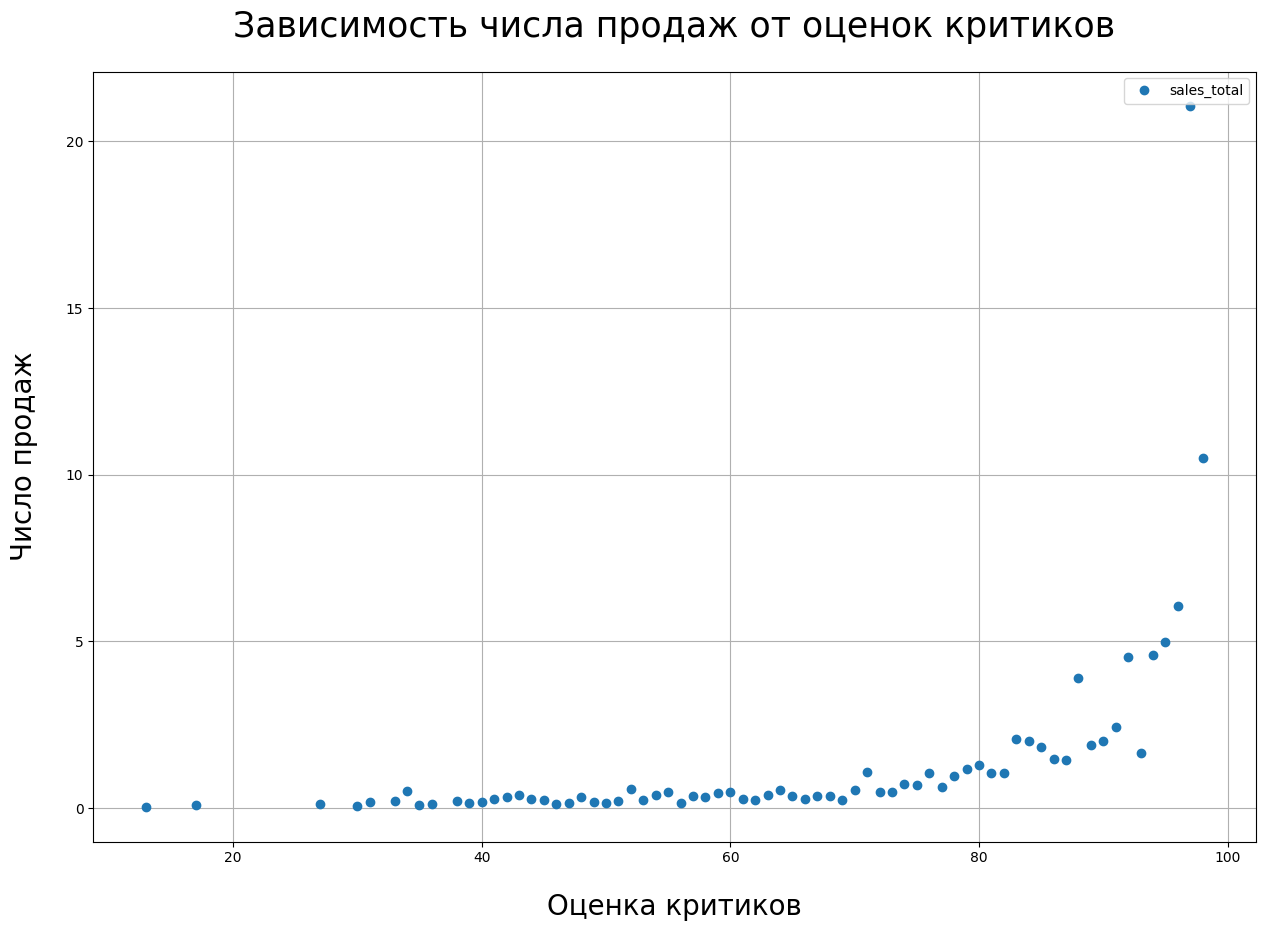

In [185]:
data.query('platform == "PS3"').pivot_table(index='critic_score', values='sales_total', aggfunc='mean').plot(
    y='sales_total', grid=True, figsize=(15, 10), style='o');

plt.title('Зависимость числа продаж от оценок критиков', fontsize=25, pad=25)
plt.xlabel('Оценка критиков', fontsize=20, labelpad=20)
plt.ylabel('Число продаж', fontsize=20, labelpad=20);

In [186]:
data.query('(platform == "PS3")')['critic_score'].corr(data.query('(platform == "PS3")')['sales_total'], method='spearman')

0.6559140119767292

Явная зависимость наблюдается между числом продаж и оценками критиков, особенно на высоких значениях этих оценок.

#### Общие оценки игроков

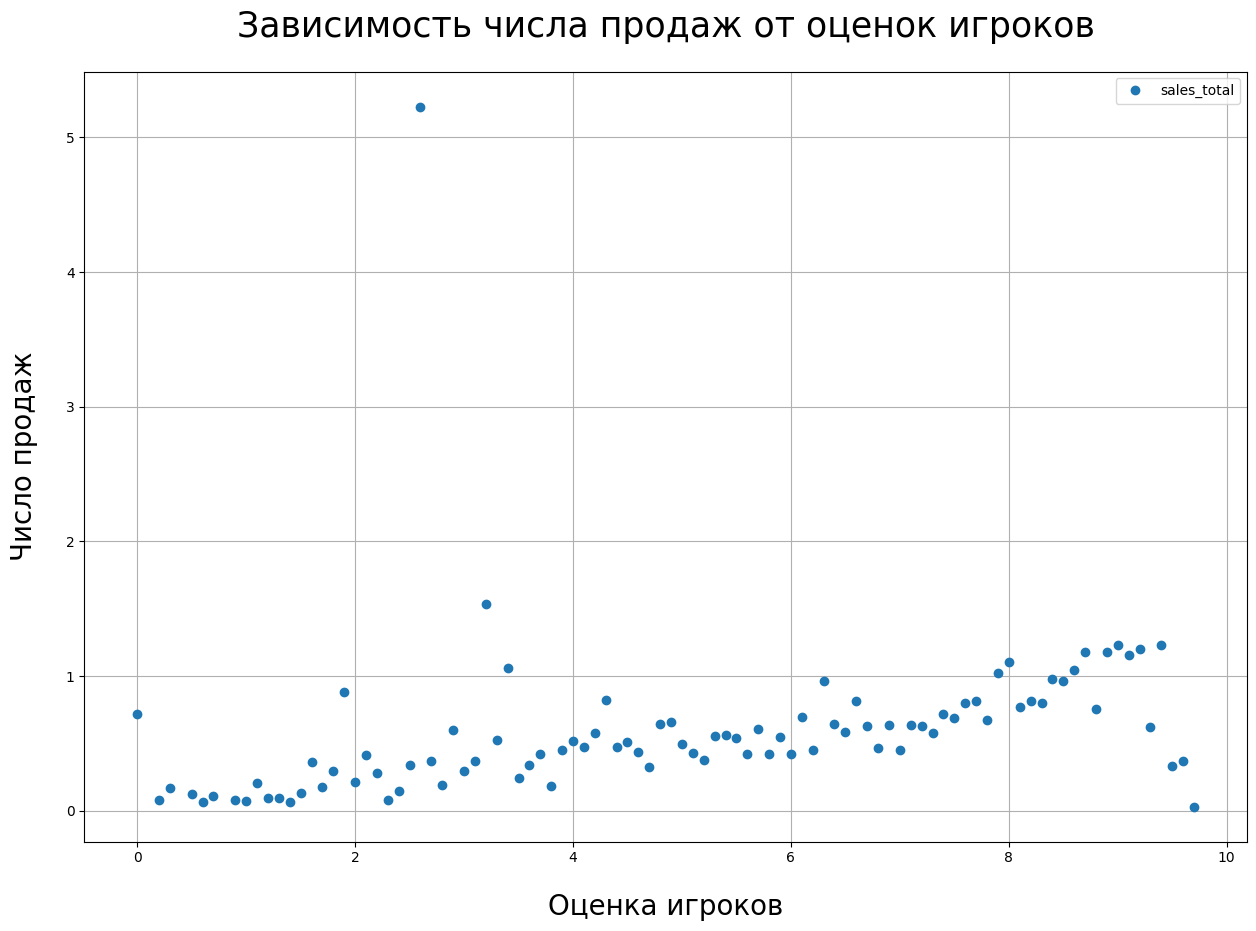

In [187]:
data.pivot_table(index='user_score', values='sales_total', aggfunc='mean').plot(
    y='sales_total', grid=True, figsize=(15, 10), style='o');

plt.title('Зависимость числа продаж от оценок игроков', fontsize=25, pad=25)
plt.xlabel('Оценка игроков', fontsize=20, labelpad=20)
plt.ylabel('Число продаж', fontsize=20, labelpad=20);

In [188]:
data['user_score'].corr(data['sales_total'], method='spearman')

0.1491686134720833

Прослеживается нелинейная зависимость между оценками игроков и числом продаж. Не все игры, очень хорошо оцененные игроками, хорошо продались.

#### Общие оценки критиков

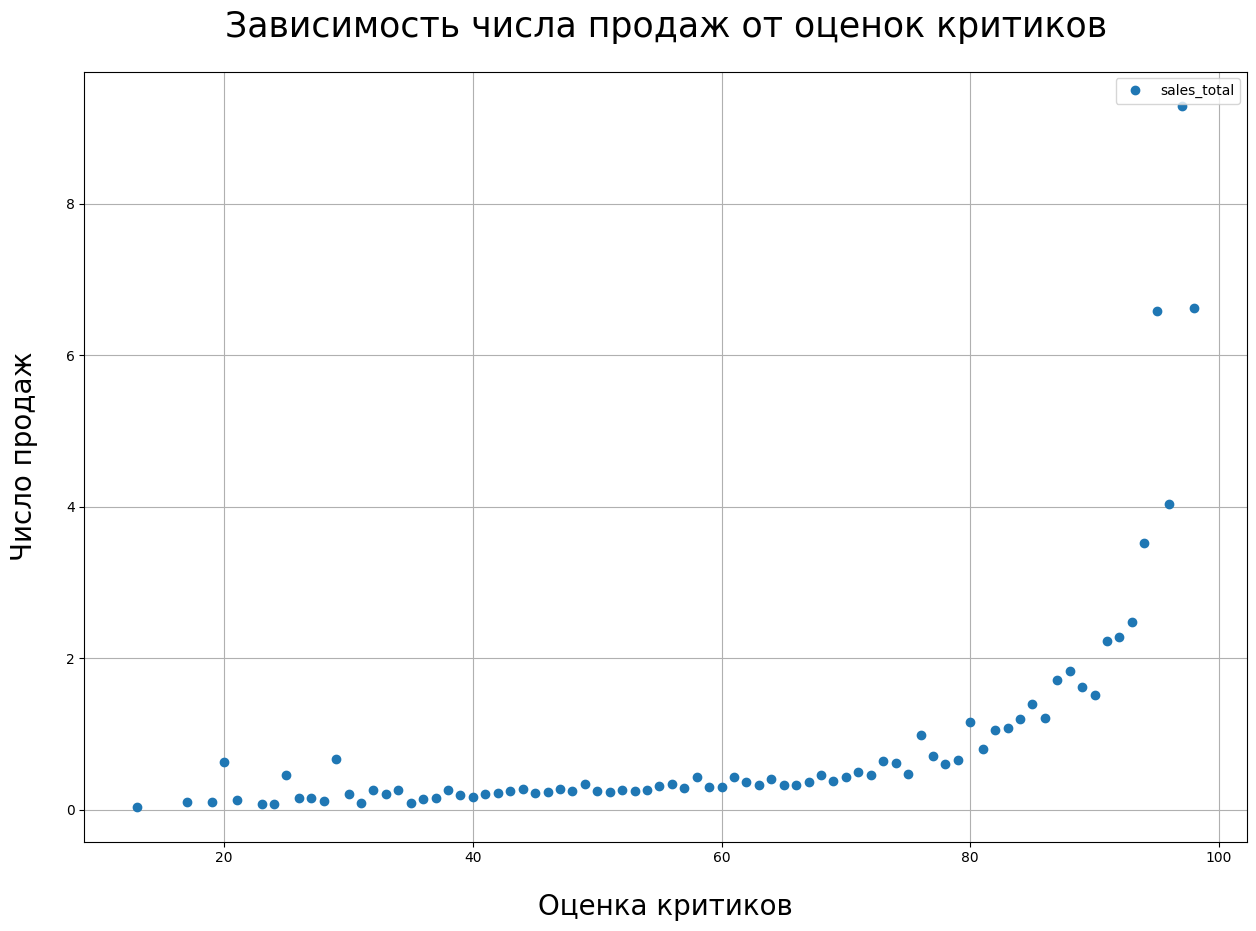

In [189]:
data.pivot_table(index='critic_score', values='sales_total', aggfunc='mean').plot(
    y='sales_total', grid=True, figsize=(15, 10), style='o');

plt.title('Зависимость числа продаж от оценок критиков', fontsize=25, pad=25)
plt.xlabel('Оценка критиков', fontsize=20, labelpad=20)
plt.ylabel('Число продаж', fontsize=20, labelpad=20);

In [190]:
data['critic_score'].corr(data['sales_total'], method='spearman')

0.39239591889585507

Видно, что подобное распределение характерно не только для PS3, но и для всех платформ в целом. Можно сказать, что оценки пользователей почти не связаны с продажами игр, в отличие от оценок критиков, которые прямо связаны с объёмом продаж.

### Анализ жанров

Избавимся от дубликатов игр, которые выходили на разных платформах

In [191]:
data_drop = data.query('(2012 < year_of_release)').drop_duplicates(subset='name')

In [212]:
explode = [0.03] * len(data_drop['genre'].unique())

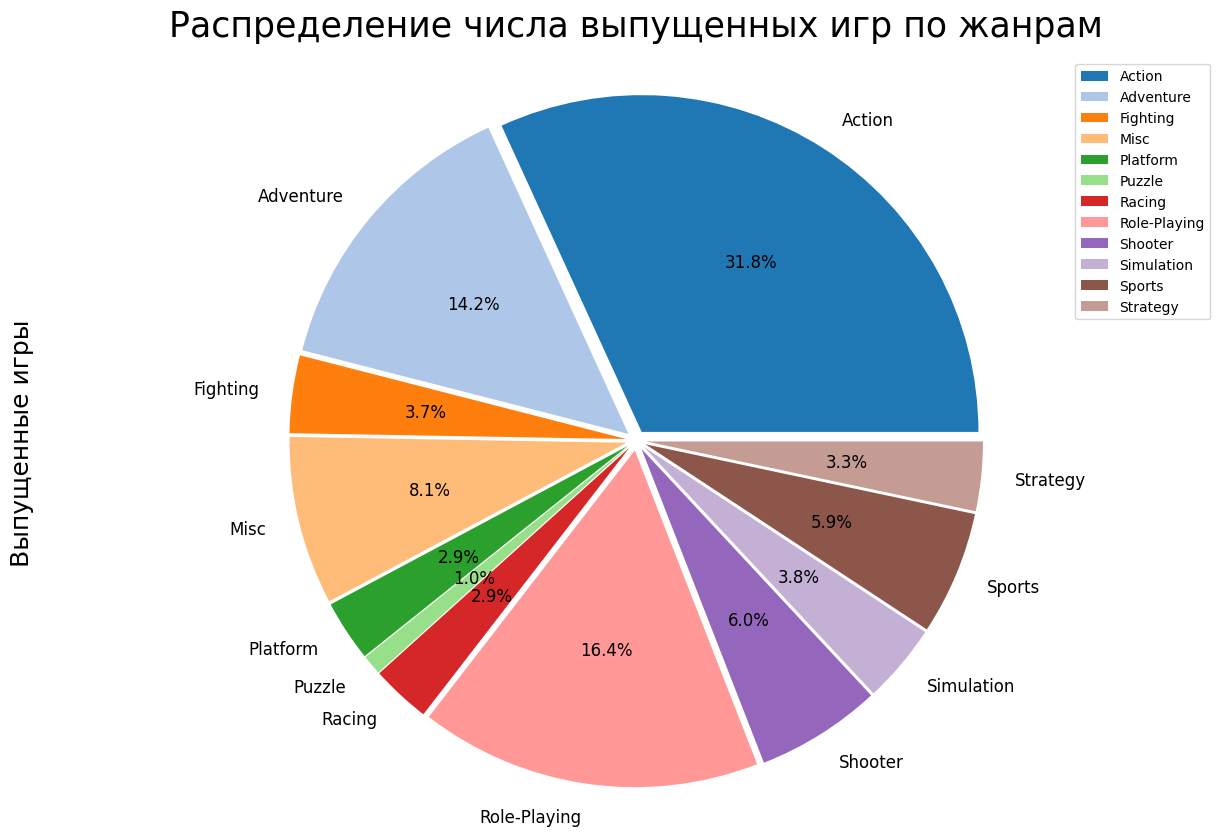

In [217]:
colors = plt.get_cmap('tab20').colors  
ax = data_drop.pivot_table(index='genre', values='sales_total', aggfunc='count').plot(
    ylabel='Выпущенные игры', kind='pie', y='sales_total', figsize=(15, 10), autopct='%1.1f%%', colors=colors, 
    textprops={'fontsize': 12}, explode=explode)
plt.axis('equal');

ax.set_ylabel('Выпущенные игры', fontsize=18, labelpad=15)
plt.title('Распределение числа выпущенных игр по жанрам', fontsize=25, pad=15);

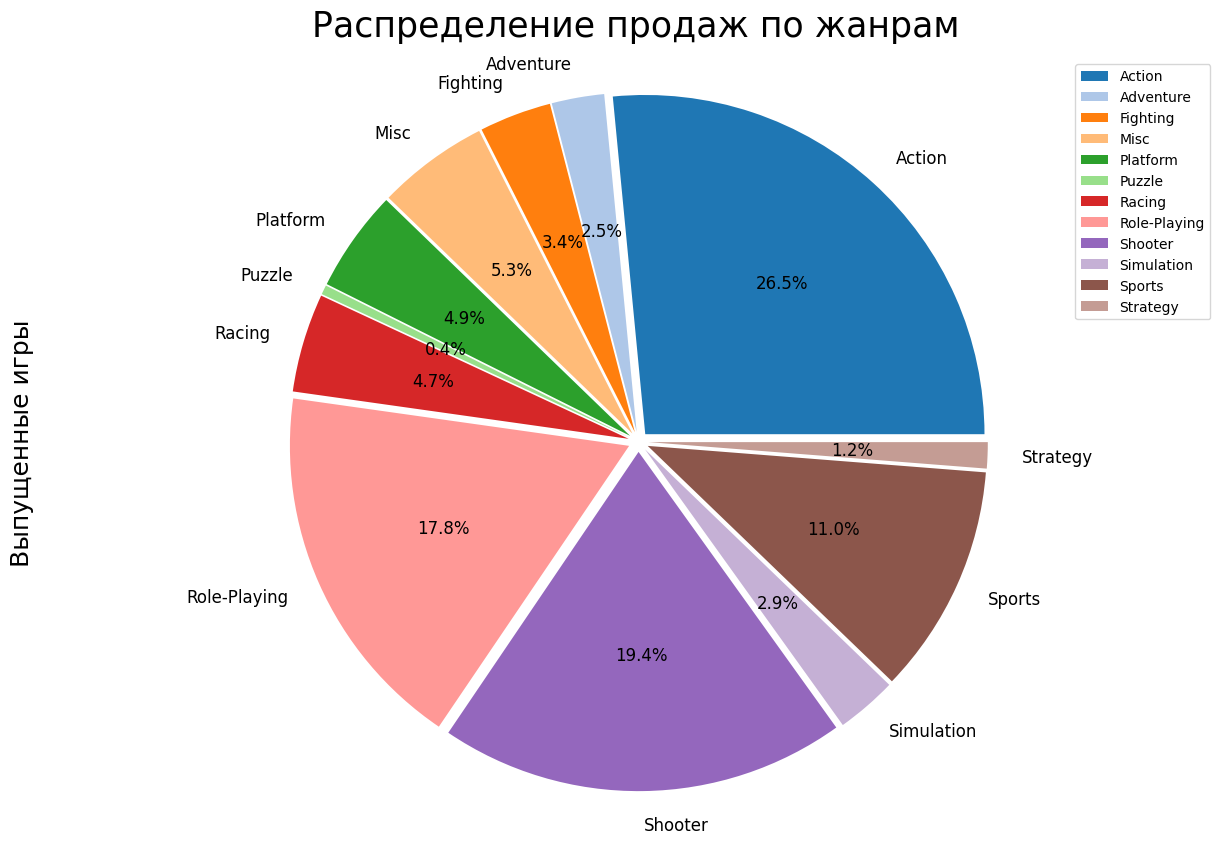

In [216]:
colors = plt.get_cmap('tab20').colors  
ax = data_drop.pivot_table(index='genre', values='sales_total', aggfunc='sum').plot(
    ylabel='Общие продажи', kind='pie', y='sales_total', figsize=(15, 10), autopct='%1.1f%%', 
    colors=colors, textprops={'fontsize': 12}, explode=explode)
plt.axis('equal');

ax.set_ylabel('Выпущенные игры', fontsize=18, labelpad=15)
plt.title('Распределение продаж по жанрам', fontsize=25, pad=15);

In [195]:
genre = data_drop.pivot_table(index='genre', values='sales_total', aggfunc=['count', 'sum', 'mean'])
genre.columns = ['count', 'sum', 'mean']
genre.sort_values(by='mean', ascending=False)

,count,sum,mean
genre,,,
Shooter,76,128.27,1.687763
Sports,75,72.55,0.967333
Platform,37,32.10,0.867568
Racing,36,31.13,0.864722
Role-Playing,207,117.50,0.567633
Fighting,47,22.72,0.483404
Action,402,175.55,0.436692
Simulation,48,19.11,0.398125
Misc,102,35.12,0.344314


Видно, что по числу выпусков лидируют игры жанра:

    Action: 402
    Role-Playing: 207
    Adventure: 179
    Shooter: 76
    Sports: 75

Рейтинг по числу продаж немного отличается:

    Action: 175.55
    Shooter: 128.27
    Role-Playing: 117.50
    Sports: 72.55
    Misc: 35.12

Action сохраняет за собой первое место по числу продаж. Role-Playing уступает вторую позицию Shooter. Sports поднимается на одну строчку выше, а в пятерку лидеров неожиданно врывается Misc. Adventure выпадает из пятерки лучших.

Однако по проценту продаж картина меняется кардинально:

    Shooter: 1.687763
    Sports: 0.967333
    Platform: 0.867568
    Racing: 0.864722
    Role-Playing: 0.567633

Среди всех жанров наибольший процент продаж у Shooter! За ними идут Sports, затем Platform и Racing. В итоге Role-Playing оказывается на пятом месте по проценту продаж.

## Портрет пользователя каждого региона

### Определим топ-5 платформ для каждого региона

Зададим актуальный период 2013 годом

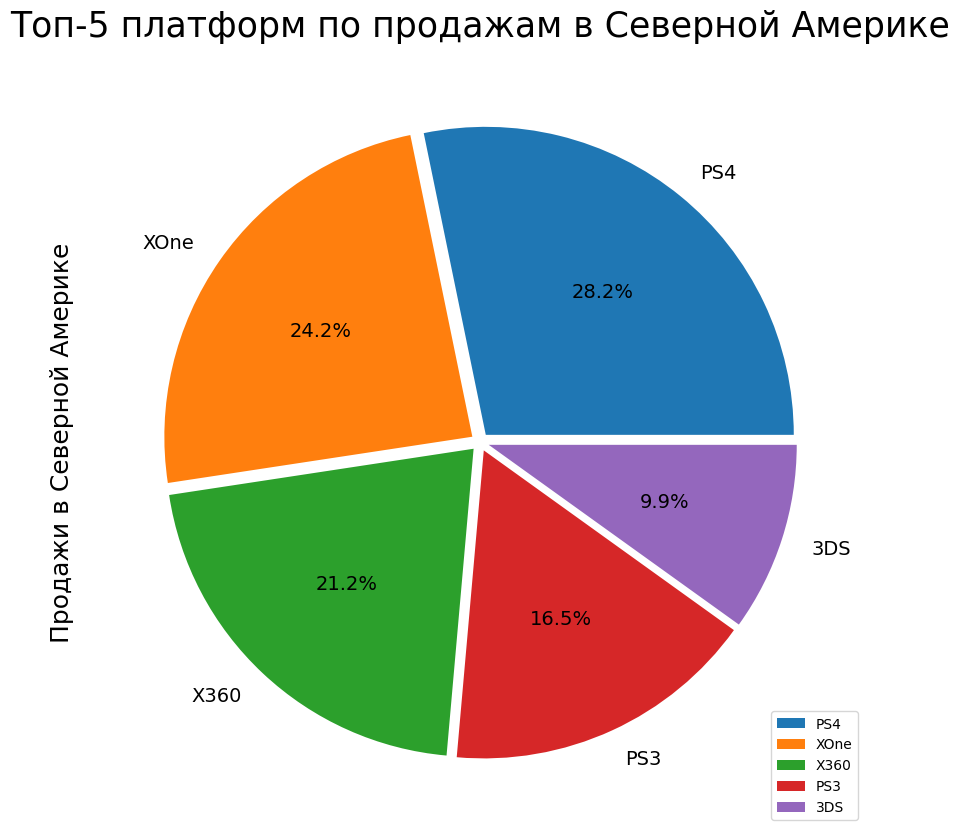

In [196]:
na_platform = data.query('year_of_release > 2012').pivot_table(
    index='platform', aggfunc='sum', values='na_sales').sort_values(ascending=False, by='na_sales')[0: 5]

explode = [0.03] * 5

ax = na_platform.plot(
    ylabel='Продажи в Северной Америке',
    kind='pie',
    y='na_sales',
    labels=na_platform.index,
    autopct='%1.1f%%',
    textprops={'fontsize': 14},
    explode = explode,
    figsize=(15, 10)
);

ax.set_ylabel('Продажи в Северной Америке', fontsize=18, labelpad=15)
plt.title('Топ-5 платформ по продажам в Северной Америке', fontsize=25, pad=15);

In [197]:
data.query('year_of_release > 2012').pivot_table(
    index='platform', aggfunc='sum', values='na_sales').sort_values(ascending=False, by='na_sales')[0: 5]

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


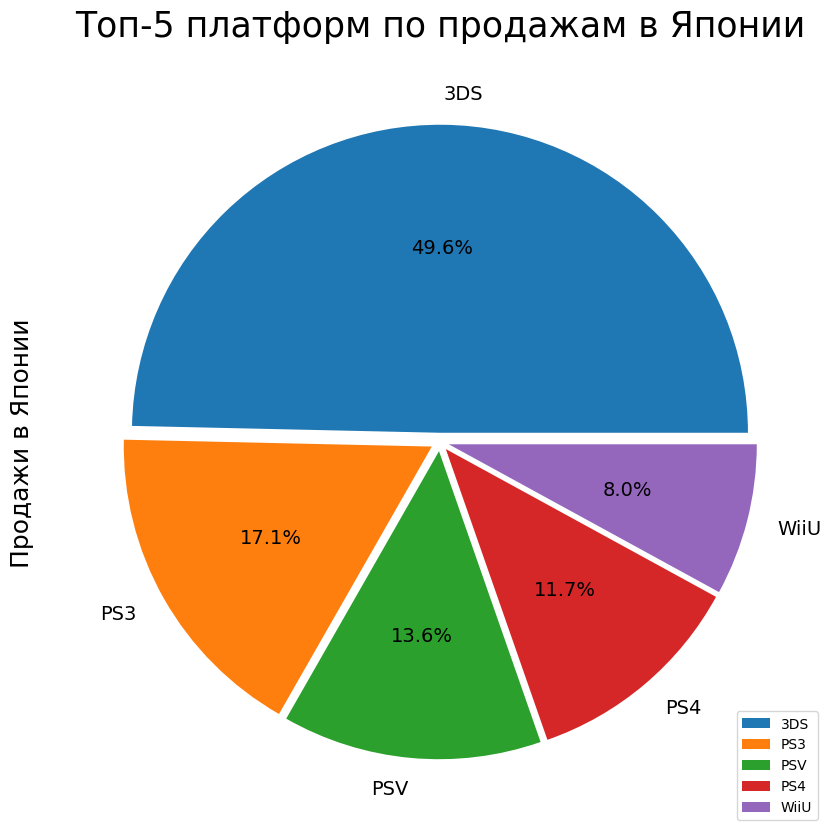

In [198]:
jp_platform = data.query('year_of_release > 2012').pivot_table(
    index='platform', aggfunc='sum', values='jp_sales').sort_values(ascending=False, by='jp_sales')[0: 5]

explode = [0.03] * 5

ax = jp_platform.plot(
    ylabel='Продажи в Японии',
    kind='pie',
    y='jp_sales',
    labels=jp_platform.index,
    autopct='%1.1f%%',
    textprops={'fontsize': 14},
    explode = explode,
    figsize=(15, 10)
);

ax.set_ylabel('Продажи в Японии', fontsize=18, labelpad=15)
plt.title('Топ-5 платформ по продажам в Японии', fontsize=25, pad=15);

In [199]:
data.query('year_of_release > 2012').pivot_table(
    index='platform', aggfunc='sum', values='jp_sales').sort_values(ascending=False, by='jp_sales')[0: 5]

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


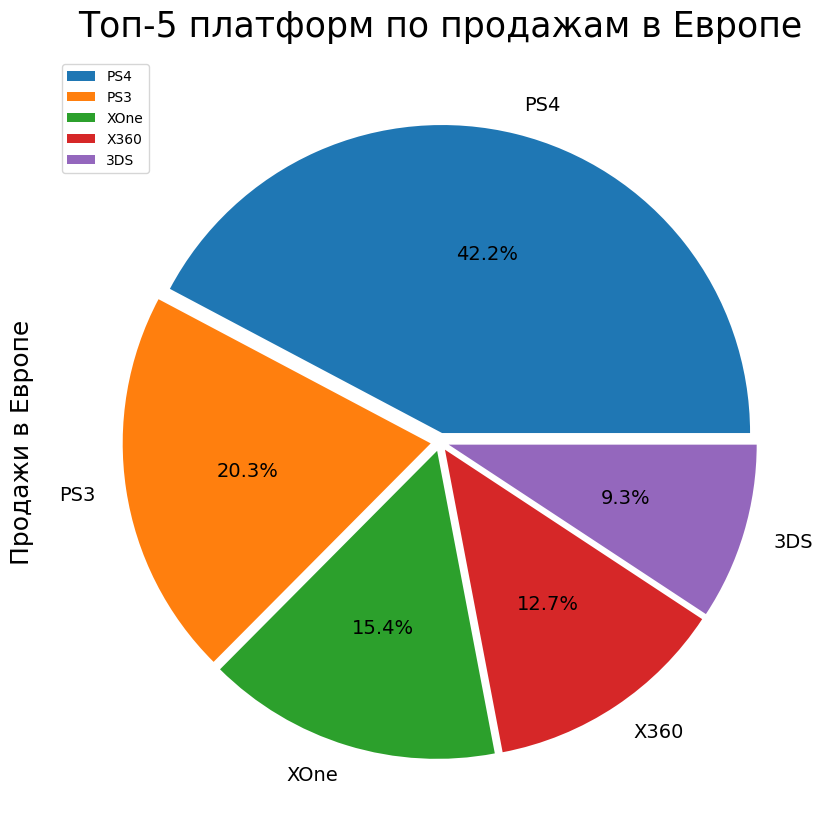

In [200]:
eu_platform = data.query('year_of_release > 2012').pivot_table(
    index='platform', aggfunc='sum', values='eu_sales').sort_values(ascending=False, by='eu_sales')[0: 5]

explode = [0.03] * 5

ax = eu_platform.plot(
    ylabel='Продажи в Европе',
    kind='pie',
    y='eu_sales',
    labels=eu_platform.index,
    autopct='%1.1f%%',
    textprops={'fontsize': 14},
    explode = explode,
    figsize=(15, 10)
);

ax.set_ylabel('Продажи в Европе', fontsize=18, labelpad=15)
plt.title('Топ-5 платформ по продажам в Европе', fontsize=25, pad=15);

In [201]:
data.query('year_of_release > 2012').pivot_table(
    index='platform', aggfunc='sum', values='eu_sales').sort_values(ascending=False, by='eu_sales')[0: 5]

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


Северная Америка (na_sales):

   - Лидирует PS4 с продажами 108.74 млн.
   - На втором месте Xbox One с 93.12 млн.
   - Xbox 360 также показывает хорошие результаты (81.66 млн), что подчеркивает популярность консолей от Microsoft в этом регионе.
   - PS3 и 3DS занимают четвертое и пятое места с 63.50 и 38.20 млн продаж соответственно.

Япония (jp_sales):

   - Здесь ситуация значительно отличается от Северной Америки. Лидирует 3DS с 67.81 млн продаж, что подтверждает популярность портативных устройств в Японии.
   - PS3 занимает второе место (23.35 млн), а PSV — третье (18.59 млн).
   - Интересно, что PS4 (15.96 млн) уступает не только старшей версии PS3, но и портативной PS Vita.
   - WiiU завершает пятерку с 10.88 млн продаж.

Европа (eu_sales):

   - Здесь PS4 также уверенно лидирует с 141.09 млн продаж, что делает ее самой популярной платформой.
   - PS3 на втором месте с продажами 67.81 млн, показывая, что PlayStation традиционно сильна в Европе.
   - Xbox One и Xbox 360 занимают третье и четвертое места с 51.59 и 42.52 млн продаж соответственно.
   - Замыкает пятерку 3DS с 30.96 млн.
    
Общие тенденции:

   - PS4 — самая популярная платформа в Северной Америке и Европе, но в Японии уступает 3DS.
   - Xbox значительно более популярны в Северной Америке и Европе, чем в Японии, где их почти нет в топе.
   - 3DS особенно популярна в Японии, но также имеет хорошие показатели в Северной Америке и Европе.
   - Различия в региональных предпочтениях хорошо отражают культурные и рыночные особенности каждого региона.



### Определим топ-5 жанров для каждого региона

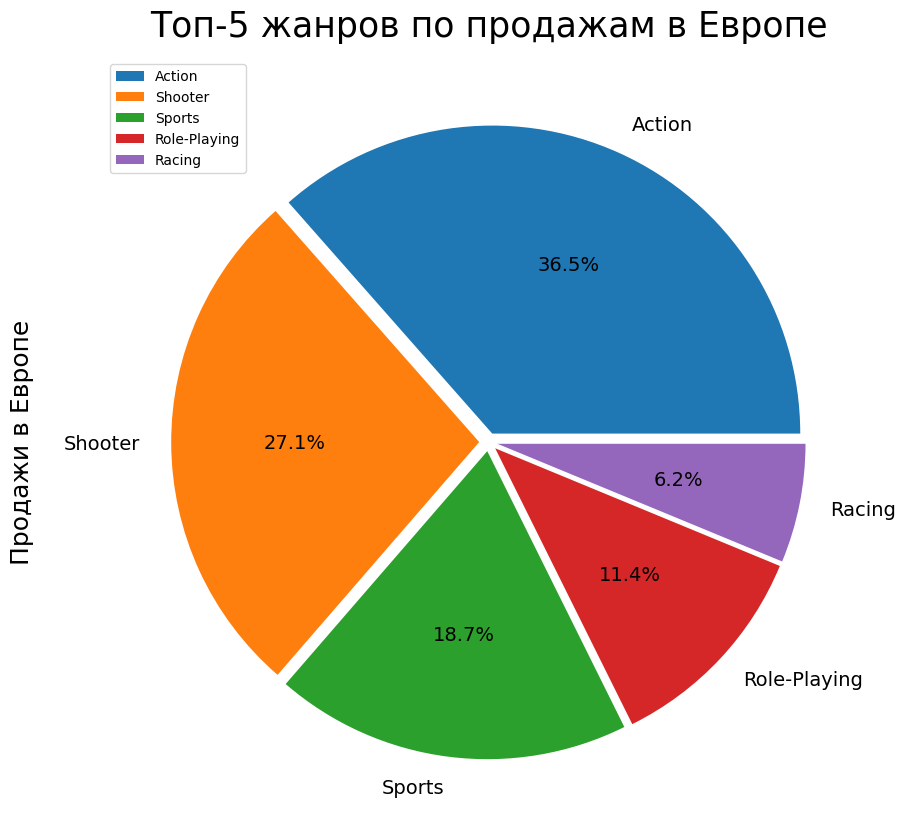

In [202]:
eu_genre = data.query('year_of_release > 2012').pivot_table(
    index='genre', aggfunc='sum', values='eu_sales').sort_values(ascending=False, by='eu_sales')[0: 5]

explode = [0.03] * 5

ax = eu_genre.plot(
    ylabel='Продажи в Европе',
    kind='pie',
    y='eu_sales',
    labels=eu_genre.index,
    autopct='%1.1f%%',
    textprops={'fontsize': 14},
    explode = explode,
    figsize=(15, 10)
);

ax.set_ylabel('Продажи в Европе', fontsize=18, labelpad=50)
plt.title('Топ-5 жанров по продажам в Европе', fontsize=25, pad=15);

In [203]:
data.query('year_of_release > 2012').pivot_table(
    index='genre', aggfunc='sum', values='eu_sales').sort_values(ascending=False, by='eu_sales')[0: 5]

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


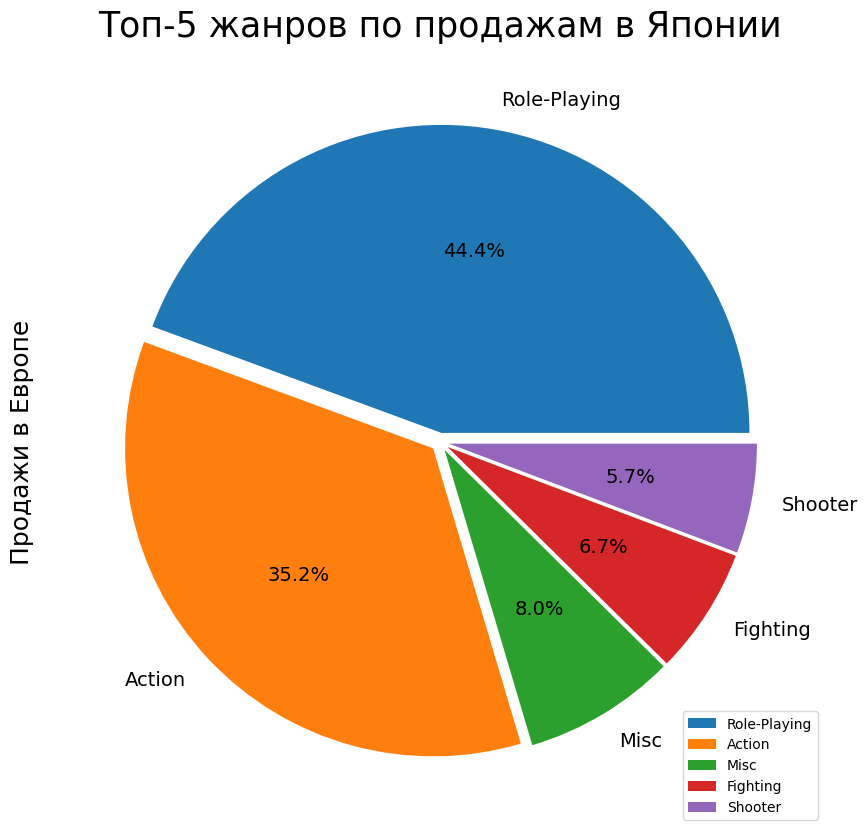

In [204]:
jp_genre = data.query('year_of_release > 2012').pivot_table(
    index='genre', aggfunc='sum', values='jp_sales').sort_values(ascending=False, by='jp_sales')[0: 5]

explode = [0.03] * 5

ax = jp_genre.plot(
    ylabel='Продажи в Японии',
    kind='pie',
    y='jp_sales',
    labels=jp_genre.index,
    autopct='%1.1f%%',
    textprops={'fontsize': 14},
    explode = explode,
    figsize=(15, 10)
);

ax.set_ylabel('Продажи в Европе', fontsize=18, labelpad=15)
plt.title('Топ-5 жанров по продажам в Японии', fontsize=25, pad=15);

In [205]:
data.query('year_of_release > 2012').pivot_table(
    index='genre', aggfunc='sum', values='jp_sales').sort_values(ascending=False, by='jp_sales')[0: 5]

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


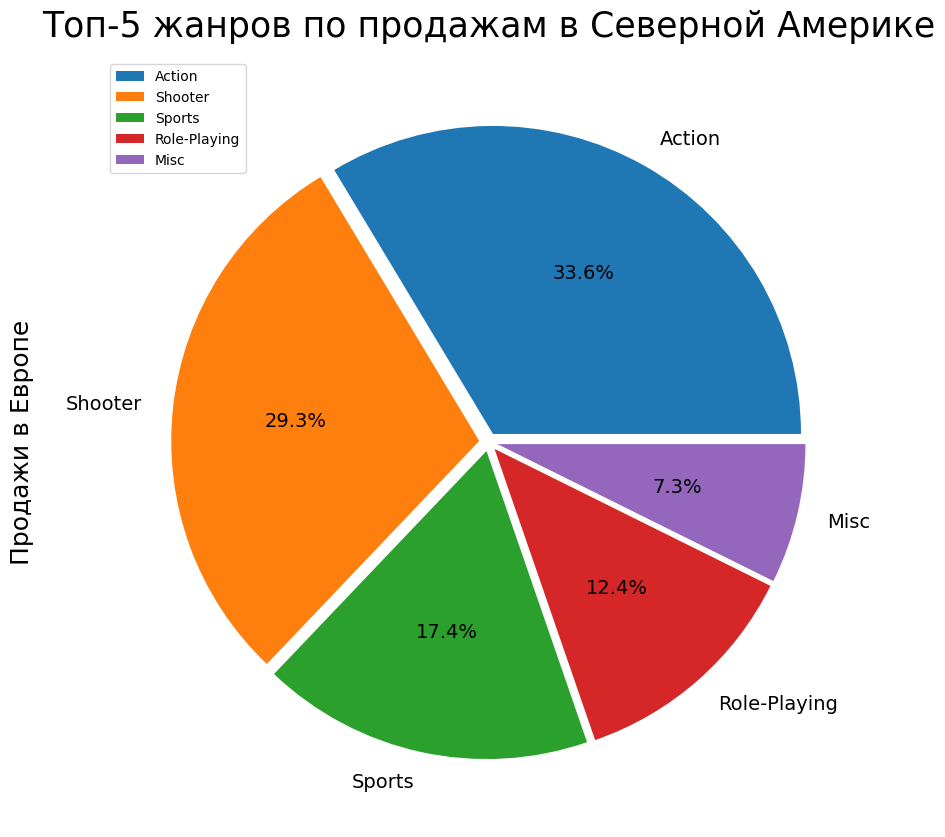

In [206]:
na_genre = data.query('year_of_release > 2012').pivot_table(
    index='genre', aggfunc='sum', values='na_sales').sort_values(ascending=False, by='na_sales')[0: 5]

explode = [0.03] * 5

ax = na_genre.plot(
    ylabel='Продажи в Северной Америке',
    kind='pie',
    y='na_sales',
    labels=na_genre.index,
    autopct='%1.1f%%',
    textprops={'fontsize': 14},
    explode = explode,
    figsize=(15, 10)
);

ax.set_ylabel('Продажи в Европе', fontsize=18, labelpad=50)
plt.title('Топ-5 жанров по продажам в Северной Америке', fontsize=25, pad=15);

In [207]:
data.query('year_of_release > 2012').pivot_table(
    index='genre', aggfunc='sum', values='na_sales').sort_values(ascending=False, by='na_sales')[0: 5]

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


Европа (eu_sales):

   - Action является самым популярным жанром в Европе с 118.13 млн продаж, что делает его безусловным лидером.
   - Shooter занимает второе место с 87.86 млн продаж.
   - Sports (60.52 млн) также входит в тройку лидеров, что говорит о популярности спортивных игр.
   - Жанр Role-Playing имеет более скромные показатели (36.97 млн), но всё же входит в топ-5.
   - Racing (20.19 млн) завершает пятерку, хотя продажи гоночных игр существенно ниже по сравнению с лидерами.

Япония (jp_sales):

   - В Японии доминирует жанр Role-Playing с 51.04 млн продаж, что подчеркивает особую любовь японских игроков к ролевым играм.
   - Action также популярен (40.49 млн), но уступает ролевым играм.
   - Misc (9.20 млн) и Fighting (7.65 млн) занимают следующие места, демонстрируя уникальные предпочтения японских игроков.
   - Shooter, который популярен в других регионах, в Японии занимает пятое место с 6.61 млн продаж.

Северная Америка (na_sales):

   - Action также лидирует в Северной Америке с 126.05 млн продаж, подтверждая свою глобальную популярность.
   - Shooter занимает второе место с 109.74 млн продаж, показывая значительное влияние жанра шутеров в этом регионе.
   - Sports (65.27 млн) на третьем месте, что свидетельствует о популярности спортивных симуляторов.
   - Role-Playing (46.40 млн) также в пятерке, но продажи заметно ниже, чем у других жанров.
   - Жанр Misc (27.49 млн) замыкает пятерку, что указывает на его стабильную, но не доминирующую роль.

Общие выводы:

   - Action и Shooter доминируют как в Европе, так и в Северной Америке, что делает их самыми популярными жанрами в этих регионах.
   - В Японии ролевые игры (Role-Playing) наиболее популярны, в то время как шутеры здесь занимают гораздо менее значимое место.
   - Спортивные игры (Sports) популярны в Северной Америке и Европе, но почти не представлены в топ-5 жанров в Японии.
   - Явные культурные различия в жанровых предпочтениях между регионами подчёркивают, как региональные рынки влияют на успех определённых жанров игр.

In [208]:
data['rating'] = data['rating'].fillna('UNKNOWN')

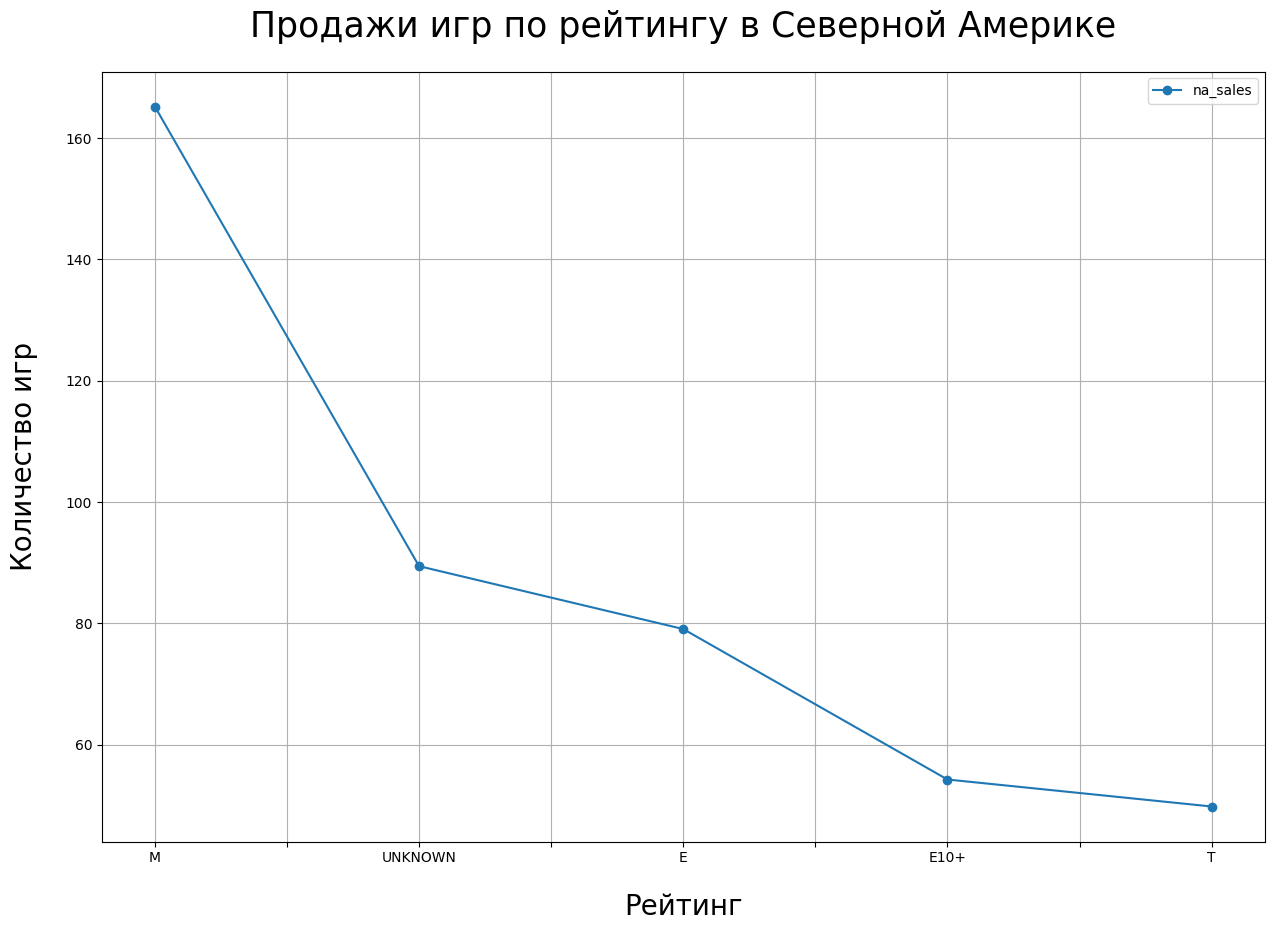

In [209]:
data.query('year_of_release > 2012').pivot_table(
    index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).plot(
    grid=True, kind='line', figsize=(15, 10), marker='o')

plt.title('Продажи игр по рейтингу в Северной Америке', fontsize=25, pad=25)
plt.xlabel('Рейтинг', fontsize=20, labelpad=20)
plt.ylabel('Количество игр', fontsize=20, labelpad=20);

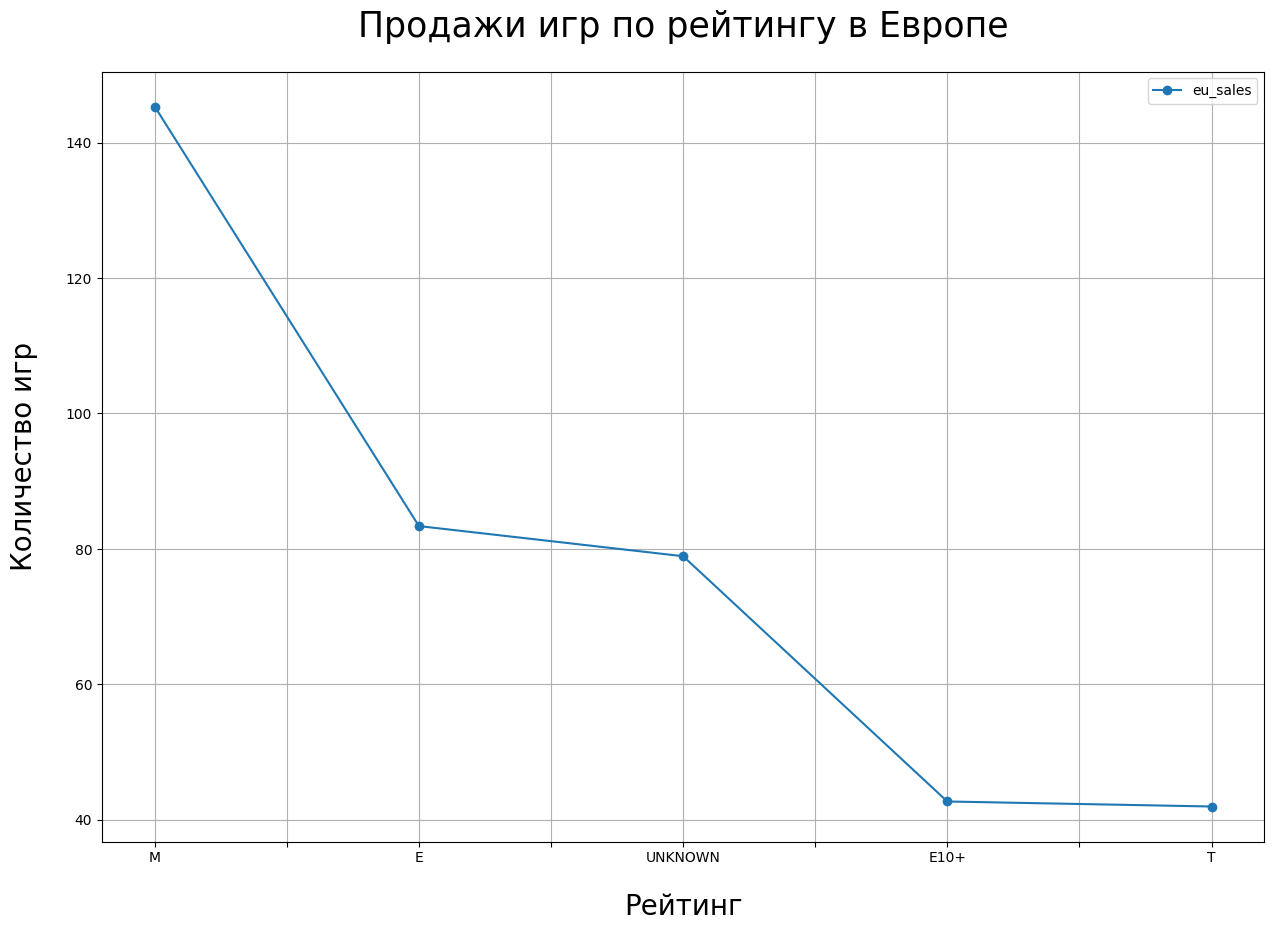

In [210]:
data.query('year_of_release > 2012').pivot_table(
    index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).plot(
    grid=True, kind='line', figsize=(15, 10), marker='o')

plt.title('Продажи игр по рейтингу в Европе', fontsize=25, pad=25)
plt.xlabel('Рейтинг', fontsize=20, labelpad=20)
plt.ylabel('Количество игр', fontsize=20, labelpad=20);

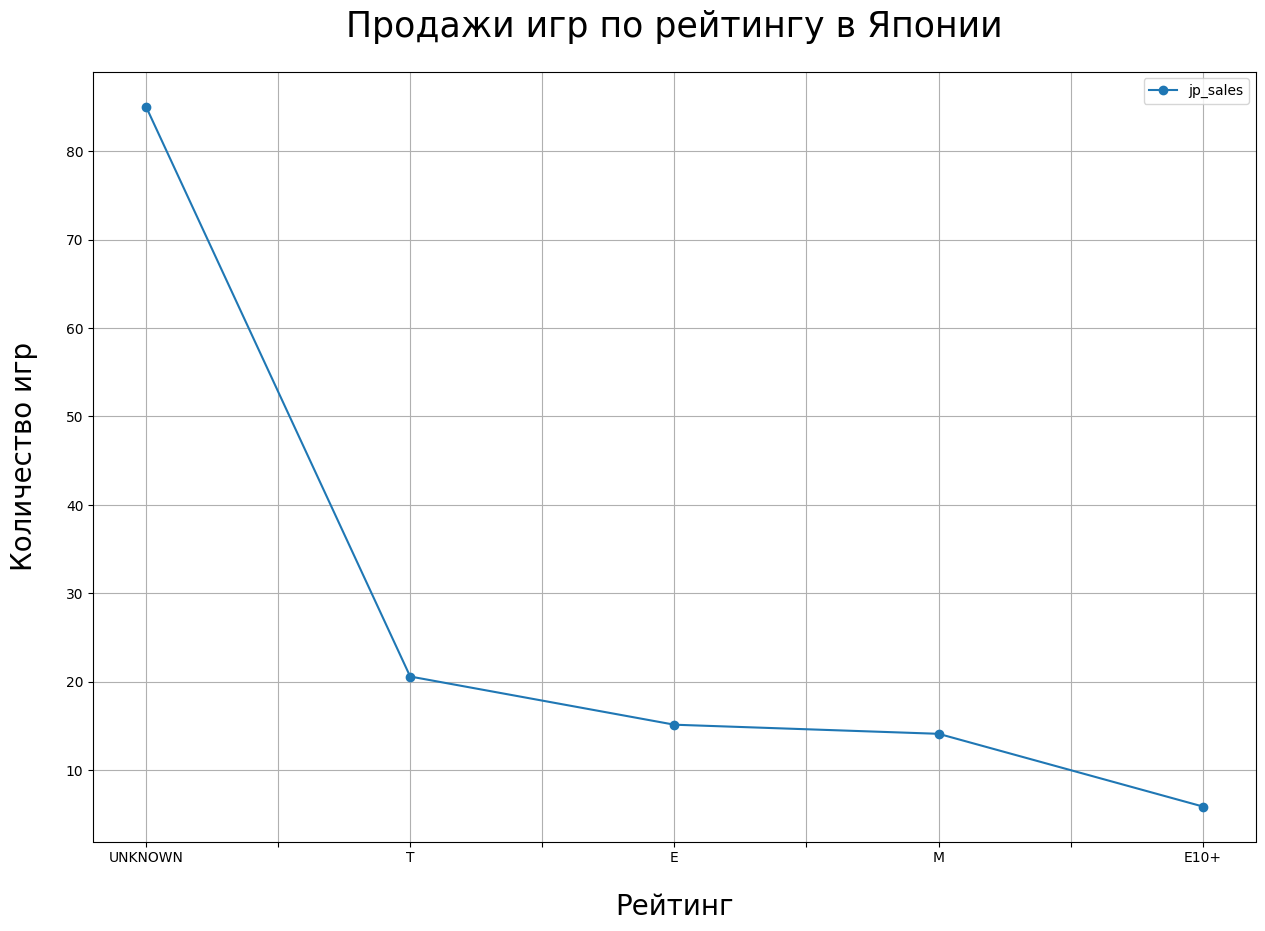

In [211]:
data.query('year_of_release > 2012').pivot_table(
    index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).plot(
    grid=True, kind='line', figsize=(15, 10), marker='o')

plt.title('Продажи игр по рейтингу в Японии', fontsize=25, pad=25)
plt.xlabel('Рейтинг', fontsize=20, labelpad=20)
plt.ylabel('Количество игр', fontsize=20, labelpad=20);

Северная Америка (na_sales):

   - M (Mature) — наиболее популярный рейтинг после 2013 года с продажами 165.21 млн, что говорит о повышенном интересе к играм для взрослых.
   - E (Everyone) занимает второе место с 79.05 млн продаж, но его доля значительно ниже, чем у игр для взрослых.
   - E10+ — игры для детей старше 10 лет показывают продажи в размере 54.24 млн, что указывает на заметный, но не доминирующий интерес.
   - T (Teen) — продажи игр для подростков составляют 49.79 млн, что также относительно невысоко по сравнению с играми для взрослых.

Европа (eu_sales):

   - M (Mature) также лидирует с продажами 145.32 млн, что отражает схожие с Северной Америкой предпочтения к играм для взрослых.
   - E (Everyone) — игры для всех возрастов занимают второе место с продажами 83.36 млн, что немного больше, чем в Северной Америке.
   - E10+ — продажи составляют 42.69 млн, что свидетельствует о стабильном, но умеренном интересе к играм для детей.
   - T (Teen) — игры для подростков занимают последнее место с продажами 41.95 млн.

Япония (jp_sales):

   - T (Teen) — здесь лидируют игры для подростков с 20.59 млн продаж, что отражает культурные различия и предпочтения японской аудитории.
   - E (Everyone) — на втором месте с 15.14 млн, хотя этот рейтинг менее популярен в Японии по сравнению с западными странами.
   - M (Mature) — игры для взрослых занимают третье место с продажами 14.11 млн, что гораздо ниже, чем в западных регионах.
   - E10+ — с 5.89 млн продаж рейтинг показывает минимальный интерес.

Общий вывод:

   - В Северной Америке и Европе высокий интерес к играм с рейтингом M (Mature).
   - E (Everyone) популярен, но его доля существенно ниже, чем у игр для взрослых.
   - В Японии рейтинг T (Teen) лидирует, что отражает местные предпочтения и меньший акцент на игры для взрослых.
   - Рейтинг E10+ не столь популярен ни в одном из регионов, но сохраняет стабильный уровень продаж.
   - В Японии рейтинговая система ESRB используется мало, так как она была разработана для западных рынков, что объясняет меньший объём продаж игр с этими рейтингами.

Отсутствие значений в колонке с рейтингом Американской ассоциации развлечений (ESRB) можно объяснить тем, что игры могли быть разработаны или изданы компаниями, не ориентированными на западные рынки.

## Общий вывод

Наибольшим спросом пользуются игры жанров: шутеры, экшен, ролевые игры и спорт. Особенно стабилен спрос на спортивные игры, а также на игры с музыкальной тематикой.

Следует обратить внимание на **отзывы критиков**, поскольку игры, получившие высокие оценки критиков, как правило, **продаются лучше**. Оценки пользователей почти не связаны с уровнем продаж и не оказывают значительного влияния на результаты.

Рекомендации по регионам:

- США: Рекомендуется делать акцент на PS4 и Xbox One, поскольку Xbox 360 и PS3 теряют актуальность и скоро завершат свои жизненные циклы.

- Европа: Лидером является PS4, в то время как доля владельцев PS3 в два раза меньше. Xbox One замыкает тройку лидеров.

- Япония: С огромным отрывом лидирует Nintendo 3DS, почти половина игроков владеют этой консолью. Значительную часть рынка занимают портативные приставки, а также PS3 и PS4.

Платформы на будущее:
На мировом рынке целесообразно ориентироваться на платформы будущего, которые будут популярны и продолжат расти в течение следующих 4-5 лет. Это **PS4** и **Xbox One**. Рынки PS3 и Xbox 360 уже практически мертвы, несмотря на высокие прошлые показатели.

Жанры:
В Европе и США наиболее популярны экшен, шутеры и спортивные игры, за ними следуют ролевые игры на четвёртой позиции. В Японии же явным лидером остаются ролевые игры, а за ними идут экшен, в то время как другие жанры имеют гораздо меньшую долю игроков. Таким образом, наиболее востребованными жанрами по всему миру остаются: **экшен, шутеры, спорт** и **ролевые игры**.

Рейтинг ESRB:
Игры с **рейтингом M** пользуются наибольшим спросом, однако в Японии этот рейтинг не применим, так как там используют другую систему классификации.

